## Part 1: Tasks

These tasks focus on fundamental concepts from this week's module.

### Task 1: Random Forest Regression Basics

**Dataset:** `Task-Datasets/task1_random_forest_data.csv`

**Objective:** Build a Random Forest regression model to predict crop yield based on weather features.

**Requirements:**
1. Load the dataset and explore its structure
2. Split the data into training (80%) and testing (20%) sets with `random_state=42`
3. Create a Random Forest Regressor with:
   - `n_estimators=100`
   - `max_depth=10`
   - `random_state=42`
4. Train the model and make predictions on the test set
5. Calculate and print the R² score
6. Display feature importance in descending order

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Mount the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load and explore the dataset
rf_data = pd.read_csv("/content/drive/MyDrive/Week-16 (Regression-3)/Task-Datasets/task1_random_forest_data.csv")

rf_data.head()

,Feature,Target
0,1,150
1,2,200
2,3,350
3,4,600
4,5,1000


In [4]:
# Explore the dataset

print("Data Info: \n")
rf_data.info()

print("Data Summary: \n")
rf_data.describe()

Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Feature  20 non-null     int64
 1   Target   20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes
Data Summary: 



,Feature,Target
count,20.00000,20.000000
mean,10.50000,2120.000000
std,5.91608,1369.729132
min,1.00000,150.000000
25%,5.75000,1150.000000
50%,10.50000,1950.000000
75%,15.25000,3375.000000
max,20.00000,4200.000000


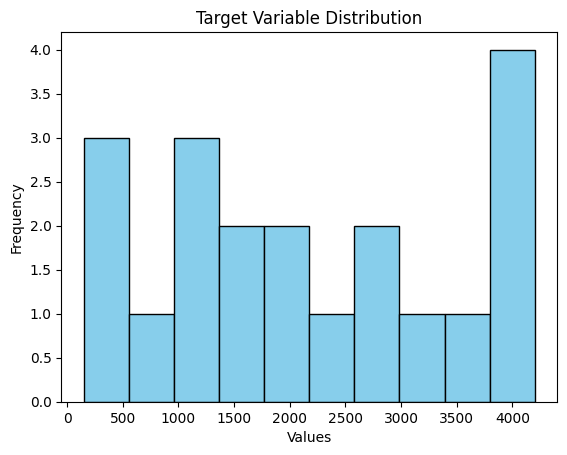

In [5]:
# visualize the target variable distrbution

plt.hist(rf_data["Target"], color='skyblue', edgecolor='black')
plt.title("Target Variable Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

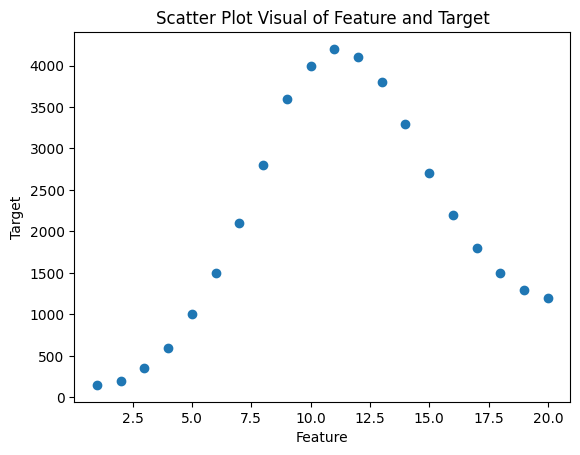

In [6]:
# visualize the scatter plot of the target variable

plt.scatter(rf_data['Feature'], rf_data['Target'])
plt.title("Scatter Plot Visual of Feature and Target")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [7]:
# Split the data into features and target

X = rf_data[['Feature']]
Y = rf_data['Target']

In [8]:
# Split into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# view the shape of the train and test set

print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {Y_train.shape}")
print(f"Y Test Shape: {Y_test.shape}")

X Train Shape: (16, 1)
X Test Shape: (4, 1)
Y Train Shape: (16,)
Y Test Shape: (4,)


In [10]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor( n_estimators=100,
                                 max_depth=10,
                                 random_state=42 )

#Train the model and make predictions on the test set
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

In [11]:
# Make predictions and calculate R² score
rf_R2 = r2_score (Y_test, Y_pred)
print (f'R2 Score of the Random Forest model: {rf_R2:.3f}' )

R2 Score of the Random Forest model: 0.878


In [12]:
# Display feature importance
feature_importances = pd.DataFrame({ "Feature": X.columns,
                                    "Importance": rf_model.feature_importances_
                                    }).sort_values(by="Importance", ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
   Feature  Importance
0  Feature         1.0


---

### Task 2: Model Performance Evaluation

**Dataset:** `Task-Datasets/task2_model_evaluation_data.csv`

**Objective:** Evaluate a regression model using multiple performance metrics.

**Requirements:**
1. Load the dataset and split into features (temperature, humidity, wind_speed) and target (power_output)
2. Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train a Random Forest Regressor with `n_estimators=50, random_state=42`
4. Make predictions on the test set
5. Calculate and display ALL of the following metrics:
   - R² Score
   - Adjusted R² Score (use formula: 1 - (1-R²) * (n-1)/(n-k-1))
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
6. Create a visualization comparing actual vs predicted values

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
# Load the dataset
salary_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Task-Datasets/task2_model_evaluation_data.csv')

# view the first 5 rows of the dataset
salary_data.head()

,Experience,Training_Hours,Previous_Projects,Salary
0,0,15,0,32
1,1,25,1,38
2,2,40,2,45
3,2,30,1,42
4,3,55,3,52


In [15]:
# view the data information
print("Salary Data Information \n")
salary_data.info()

# view the summary statistics of the data
print("\n Salary Summary Statistics")
salary_data.describe()

Salary Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Experience         51 non-null     int64
 1   Training_Hours     51 non-null     int64
 2   Previous_Projects  51 non-null     int64
 3   Salary             51 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB

 Salary Summary Statistics


,Experience,Training_Hours,Previous_Projects,Salary
count,51.000000,51.000000,51.000000,51.000000
mean,7.294118,109.470588,8.725490,84.392157
std,4.258141,58.314442,5.513904,31.228883
min,0.000000,15.000000,0.000000,32.000000
25%,4.000000,59.000000,4.000000,59.000000
50%,7.000000,108.000000,9.000000,85.000000
75%,11.000000,162.500000,13.000000,111.000000
max,15.000000,200.000000,19.000000,140.000000


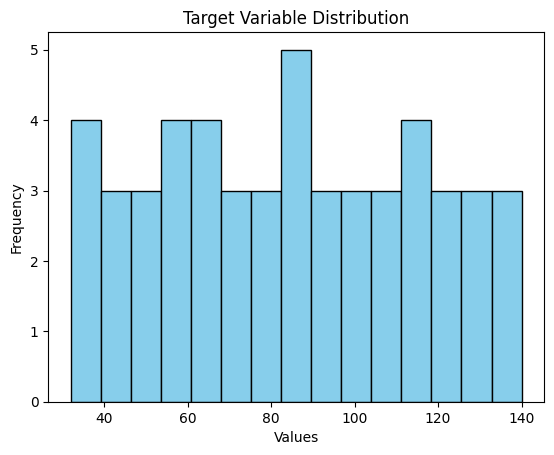

In [16]:
# visualize the target variable distrbution

plt.hist(salary_data["Salary"], bins=15, color='skyblue', edgecolor='black')
plt.title("Target Variable Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Split into features and target

# drop the target variable and assign to X
X = salary_data.drop('Salary', axis =1)

# select the target variable and assign to Y
Y = salary_data['Salary']

In [18]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.3,
                                                    random_state=42)
#verify the shape of the training and test set
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {Y_train.shape}")
print(f"Y Test Shape: {Y_test.shape}")

X Train Shape: (35, 3)
X Test Shape: (16, 3)
Y Train Shape: (35,)
Y Test Shape: (16,)


In [19]:
# Train the model with n_estimators=50
salary_rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
salary_rf_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [20]:
# Make predictions on the test data
sal_Y_pred = salary_rf_model.predict(X_test)

In [21]:
# Calculate all evaluation metrics
r2 = r2_score(Y_test, sal_Y_pred)

# Adjusted R² formula
# assign the number of observations
n = X_test.shape[0]
# assign the number of predictors
k = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mae = mean_absolute_error(Y_test, sal_Y_pred)
mse = mean_squared_error(Y_test, sal_Y_pred)
rmse = np.sqrt(mse)

# Metrics Result
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9912
Adjusted R² Score: 0.9890
Mean Absolute Error (MAE): 2.1513
Mean Squared Error (MSE): 6.6671
Root Mean Squared Error (RMSE): 2.5821


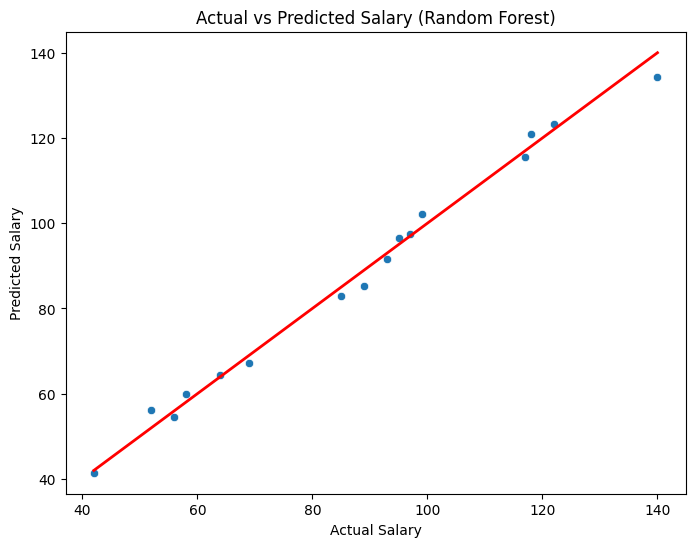

In [22]:
# Visualize actual Vs predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=sal_Y_pred)
sns.lineplot(x=[Y_test.min(), Y_test.max()], y=[Y_test.min(), Y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()



---

### Task 3: Binary Classification with Logistic Regression

**Dataset:** `Task-Datasets/task3_classification_data.csv`

**Objective:** Build a logistic regression model to classify emails as spam or not spam.

**Requirements:**
1. Load the dataset and explore its structure
2. Split into features (all columns except 'is_spam') and target ('is_spam')
3. Split into training (80%) and testing (20%) sets with `random_state=42`
4. Create and train a Logistic Regression model with `random_state=42, max_iter=1000`
5. Make predictions on the test set
6. Calculate and display:
   - Confusion Matrix
   - Accuracy Score
   - Precision Score
   - Recall Score
   - F1 Score
7. Interpret the results: Which metric is most important for spam detection and why?

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [24]:
# Load and explore the dataset
spam_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Task-Datasets/task3_classification_data.csv')

# view the first 5 rows of the data
spam_data.head()

,email_id,word_count,link_count,contains_urgent,sender_reputation,has_attachment,capital_ratio,exclamation_count,is_spam
0,E001,45,0,0,0.92,0,0.05,0,0
1,E002,128,8,1,0.15,1,0.35,12,1
2,E003,67,1,0,0.88,1,0.08,1,0
3,E004,89,6,1,0.22,0,0.42,8,1
4,E005,52,0,0,0.95,0,0.04,0,0


In [25]:
# view the data information
print("Spam Data Information \n")
spam_data.info()

# view the summary statistics of the data
print("\n Spam Data Summary Statistics")
spam_data.describe()

Spam Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   email_id           100 non-null    object 
 1   word_count         100 non-null    int64  
 2   link_count         100 non-null    int64  
 3   contains_urgent    100 non-null    int64  
 4   sender_reputation  100 non-null    float64
 5   has_attachment     100 non-null    int64  
 6   capital_ratio      100 non-null    float64
 7   exclamation_count  100 non-null    int64  
 8   is_spam            100 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.2+ KB

 Spam Data Summary Statistics


,word_count,link_count,contains_urgent,sender_reputation,has_attachment,capital_ratio,exclamation_count,is_spam
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,87.030000,4.430000,0.500000,0.519300,0.420000,0.233000,5.600000,0.500000
std,36.595649,4.472712,0.502519,0.379253,0.496045,0.182466,5.724306,0.502519
min,38.000000,0.000000,0.000000,0.060000,0.000000,0.040000,0.000000,0.000000
25%,54.750000,0.000000,0.000000,0.150000,0.000000,0.050000,0.000000,0.000000
50%,80.500000,3.000000,0.500000,0.540000,0.000000,0.205000,3.500000,0.500000
75%,113.500000,8.000000,1.000000,0.892500,1.000000,0.402500,10.000000,1.000000
max,168.000000,14.000000,1.000000,0.950000,1.000000,0.520000,17.000000,1.000000


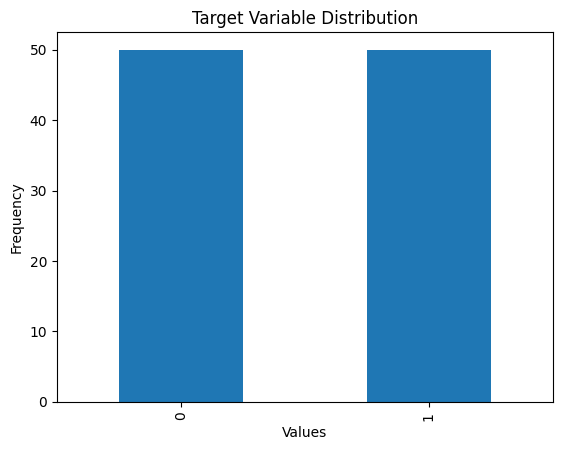

In [26]:
# visualize the target variable distrbution to check for imbalance

val = spam_data["is_spam"].value_counts()

val.plot(kind= 'bar')
plt.title("Target Variable Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

It is observed that there is no class imbalance in the target variable as both values are evenly distributed

In [27]:
# Split into features and target

# since the email_id feature won't help the model performance as it serves as a
# primary key of the data, we need to drop it while splitting into features and target

X = spam_data.drop(['is_spam', 'email_id'], axis=1)
Y = spam_data['is_spam'].values

In [28]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    random_state= 42 )

#verify the shape of the training and test set
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {Y_train.shape}")
print(f"Y Test Shape: {Y_test.shape}")

X Train Shape: (80, 7)
X Test Shape: (20, 7)
Y Train Shape: (80,)
Y Test Shape: (20,)


In [29]:
# Create and train the Logistic Regression model

spamLog_reg = LogisticRegression(max_iter=1000, random_state=42)
spamLog_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# Make predictions on the test set

spamY_pred = spamLog_reg.predict(X_test)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report: 
               precision    recall  f1-score   support

        Spam       1.00      1.00      1.00         8
    Not Spam       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



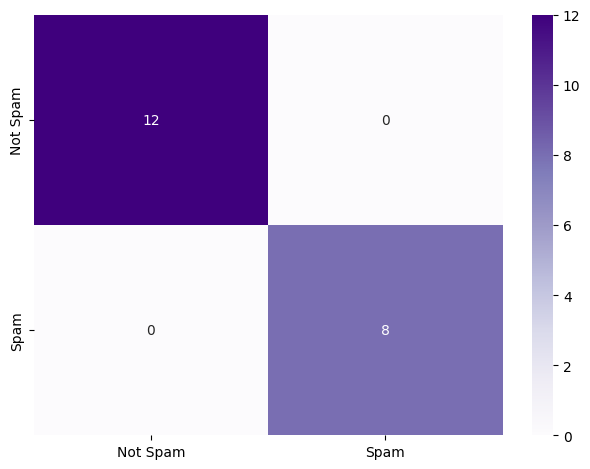

In [31]:
# Calculate and display classification metrics


# Accuracy
accuracy = accuracy_score(Y_test, spamY_pred)

# calculating Precision, Recall, and F1
precision = precision_score(Y_test, spamY_pred, average='binary')
recall = recall_score(Y_test, spamY_pred, average='binary')
f1 = f1_score(Y_test, spamY_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(Y_test, spamY_pred, labels=[1,0], target_names=["Spam", "Not Spam"])

conf_m = confusion_matrix(Y_test,spamY_pred, labels=[0,1])

# view a comprehensive report
print(f"Classification Report: \n {report}")

# visualize the confusion matrix
sns.heatmap(conf_m, annot=True, cmap="Purples", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.tight_layout()
plt.show()


**Interpretation:**

In a spam detection project, Precision is generally considered the most important metric. This is because the cost of a Type II Error (False Negative where a piece of junk mail accidentally lands in your inbox) is much higher than the minor inconvenience of a Type I Error (False Positive  i.e misclassifying an important work or personal email as spam)

While Recall is important for keeping an inbox clean, high Precision ensures that the model is reliable and doesn't misclassify any legitimate email. The F1 Score is also highly valuable because it proves the model is performing perfectly in both categories simultaneously.

---

## Part 2: Assignments

These assignments require deeper analysis and comparison of multiple models.

### Assignment 1: Comparative Regression Analysis

**Dataset:** `Assignment-Dataset/assignment1_house_prices.csv`

**Objective:** Compare multiple regression models for house price prediction.

**Requirements:**
1. Load the dataset and perform exploratory data analysis:
   - Display basic statistics
   - Check for missing values
   - Visualize the distribution of house prices
   - Create a correlation heatmap
2. Prepare the data:
   - Split into features and target (price)
   - Split into training (80%) and testing (20%) sets with `random_state=42`
3. Train and evaluate THREE models:
   - Linear Regression
   - Decision Tree Regressor (`max_depth=10, random_state=42`)
   - Random Forest Regressor (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, calculate:
   - R² Score
   - Adjusted R² Score
   - MAE
   - RMSE
5. Create a comparison table or visualization showing all metrics for all models
6. Provide a written analysis:
   - Which model performed best?
   - Why might Random Forest outperform or underperform compared to simpler models?
   - Which features are most important for price prediction? (use Random Forest feature importance)

In [32]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [33]:
# Load the dataset

house_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Assignment-Dataset/assignment1_house_prices.csv')

# view the first 5 rows of the data
house_data.head()

,Square_Feet,Bedrooms,Bathrooms,Age,Distance_to_City,Garage,Pool,Price
0,1660,2,4,20,5.5,0,0,244.67
1,930,1,5,43,28.2,0,1,139.12
2,1984,3,3,43,1.7,1,0,245.09
3,3805,2,3,2,25.9,1,0,387.78
4,3235,5,3,8,1.5,0,0,451.77


Basic Statistics


,Square_Feet,Bedrooms,Bathrooms,Age,Distance_to_City,Garage,Pool,Price
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2807.473333,3.560000,2.853333,26.746667,15.514667,0.760000,0.273333,319.831800
std,1139.752685,1.297804,1.051599,16.111269,8.526370,0.428514,0.447164,100.796847
min,809.000000,1.000000,1.000000,0.000000,1.200000,0.000000,0.000000,100.000000
25%,1823.750000,3.000000,2.000000,13.000000,7.925000,1.000000,0.000000,249.047500
50%,2665.500000,4.000000,3.000000,26.000000,16.150000,1.000000,0.000000,324.225000
75%,3696.250000,4.000000,4.000000,43.000000,22.100000,1.000000,1.000000,397.177500
max,4907.000000,6.000000,5.000000,50.000000,29.900000,1.000000,1.000000,610.360000



 Checking for missing values


,0
Square_Feet,0
Bedrooms,0
Bathrooms,0
Age,0
Distance_to_City,0
Garage,0
Pool,0
Price,0



 Visualize house prices distribution


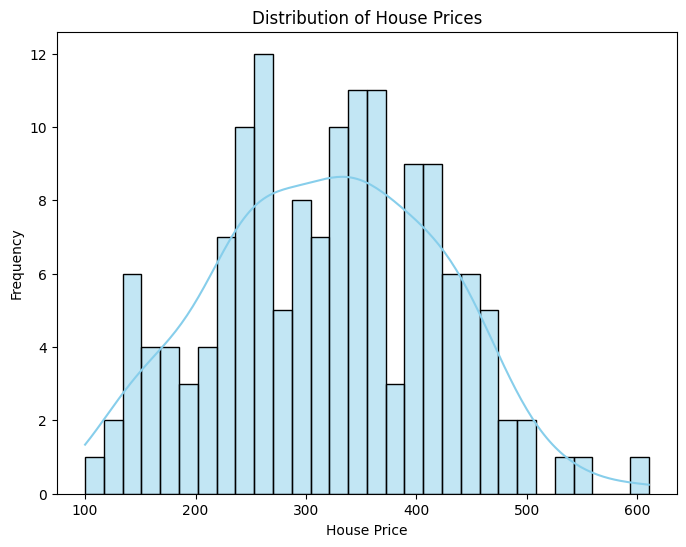


 Correlation Heatmap


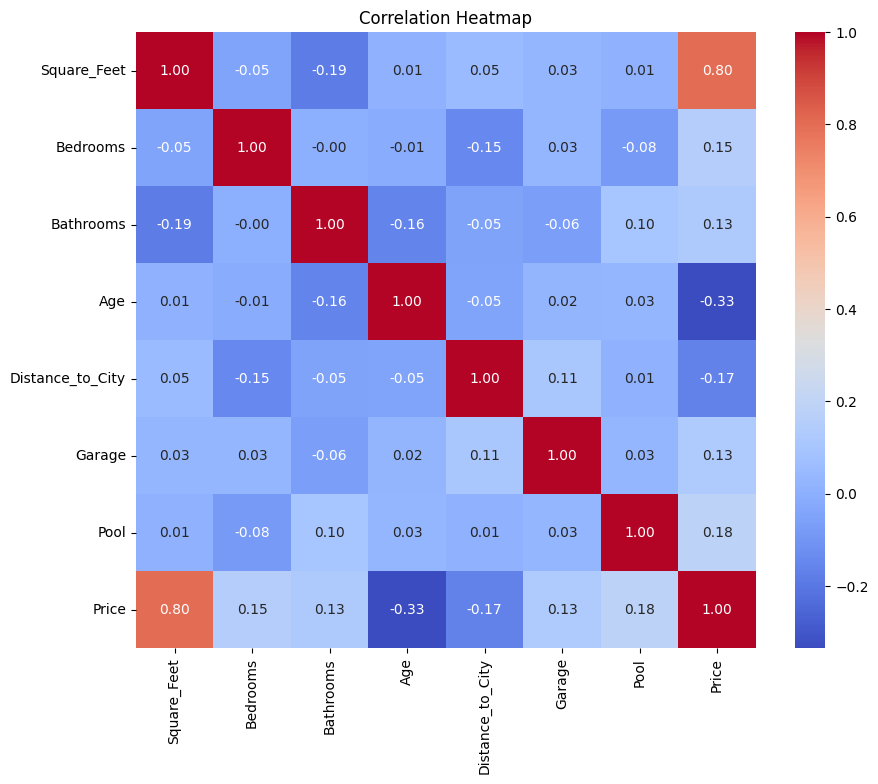

In [34]:
# Exploratory Data Analysis

# Display Basic Statistics
print("Basic Statistics")
display(house_data.describe())

# Checking for missing values
print("\n Checking for missing values")
display(house_data.isnull().sum())

# Visualize house prices distribution
print("\n Visualize house prices distribution")

plt.figure(figsize=(8,6))
sns.histplot(house_data['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()


# Correlation heatmap
print("\n Correlation Heatmap")
plt.figure(figsize=(10,8))
corr = house_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



## Key Insights from the House Price Dataset

### House Price Distribution
The histogram of house prices gives a clear snapshot of the market:  
- Prices follow an approximately **normal (bell-shaped)** distribution, with the peak falling in the **310–350** range; the most typical price segment.  
- There’s reasonable spread in the data: some homes sit at the lower end (~100), while others reach into the higher/luxury territory (up to ~600).  
- This fairly symmetric shape indicates a well-balanced dataset, which is favorable for predictive modeling as extreme values aren’t overly influential.

### Correlation Heatmap Findings
The correlation heatmap uncovers the key relationships between property features and sale price:  
- **Square Footage (0.80)** emerges as the dominant factor; larger homes consistently fetch significantly higher prices.  
- **Age (-0.33)** displays a moderate inverse relationship, indicating that older properties generally sell for less.  
- **Distance to City Center (-0.17)** has a milder negative effect, showing that being farther from urban areas tends to reduce value somewhat.  
- Other features such as **Bedrooms, Bathrooms, Garage spaces, and Pool** show positive but weaker correlations; they contribute to value, though not as decisively as size.

**Bottom line**: Square footage and property age are the primary price drivers, while additional amenities deliver more modest, incremental increases in value.

In [35]:
# Data preparation

# Split into features and target

# Features
X = house_data.drop('Price', axis =1)
# Target
Y = house_data['Price'].values

# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2,
                                                    random_state=42)

In [36]:
# Model 1: Linear Regression

# create the linear regression object
lin_reg = LinearRegression()
# fit the model to the training set
lin_reg.fit(X_train, Y_train)
#Predict on test set
Y_pred_lin = lin_reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred_lin)

# Adjusted R² formula
n = X_test.shape[0] # number of observations
k = X_test.shape[1] # number of predictors

# calculate the adjusted r2 score, mae, mse and rmse
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lin))

# Store results in df
house_lin_results = { "Model": ["Linear Regression"],
           "R²": [r2],
           "Adjusted R²": [adj_r2],
           "MAE": [mae],
           "RMSE": [rmse]
           }
# Convert to DataFrame for a better display
house_lin_results_df = pd.DataFrame(house_lin_results)

# Round values to 3dp
lin_df_results = house_lin_results_df.round(3)
print(lin_df_results)

               Model     R²  Adjusted R²     MAE    RMSE
0  Linear Regression  0.894        0.861  27.721  32.505


In [37]:
# Model 2: Decision Tree Regressor

# create the DecisionTreeRegressor Object with specified hyperparameter
house_dtree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
# fit the model to the data
house_dtree_reg.fit(X_train, Y_train)

#Predict on test set
Y_pred_tree = house_dtree_reg.predict(X_test)
# calculate the r2 score
r2 = r2_score(Y_test, Y_pred_tree)

# Adjusted R² formula
n = X_test.shape[0] # number of observations
k = X_test.shape[1] # number of predictors

# Evaluate the model metrics
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_tree))

# Store results in df
house_dtree_results = { "Model": ["Decision Tree"],
           "R²": [r2],
           "Adjusted R²": [adj_r2],
           "MAE": [mae],
           "RMSE": [rmse]
           }
# Convert to DataFrame for a better display
house_dtree_results_df = pd.DataFrame(house_dtree_results)

# Round values to 3dp
dt_df_results = house_dtree_results_df.round(3)
print(dt_df_results)

           Model     R²  Adjusted R²     MAE    RMSE
0  Decision Tree  0.563        0.424  53.913  66.076


In [38]:
# Model 3: Random Forest Regressor

# create the random forest regressor object with specific hyperparameters
house_rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# fit the model to the training set
house_rf_reg.fit(X_train, Y_train)
# Make Predictions on test set
Y_pred_rf = house_rf_reg.predict(X_test)

# evaluate the r2 score
r2 = r2_score(Y_test, Y_pred_rf)

# Adjusted R² formula
n = X_test.shape[0] # number of observations
k = X_test.shape[1] # number of predictors

# Evaluate other model metrics
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mae = mean_absolute_error(Y_test, Y_pred_rf)
mse = mean_squared_error(Y_test, Y_pred_rf)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# Store results in df
house_rf_results = { "Model": ["Random Forest"],
           "R²": [r2],
           "Adjusted R²": [adj_r2],
           "MAE": [mae],
           "RMSE": [rmse]
           }
# Convert to DataFrame for a better display
house_rf_results_rf = pd.DataFrame(house_rf_results)

# Round values to 3dp
rf_df_results = house_rf_results_rf.round(3)
print(rf_df_results)

           Model     R²  Adjusted R²     MAE    RMSE
0  Random Forest  0.862        0.818  31.848  37.137


In [39]:
# Compare all models
model_comparison_df = pd.concat([lin_df_results, dt_df_results, rf_df_results],
                          ignore_index=True)
model_comparison_df

,Model,R²,Adjusted R²,MAE,RMSE
0,Linear Regression,0.894,0.861,27.721,32.505
1,Decision Tree,0.563,0.424,53.913,66.076
2,Random Forest,0.862,0.818,31.848,37.137


            Feature  Importance
0       Square_Feet    0.681155
3               Age    0.161119
4  Distance_to_City    0.063497
2         Bathrooms    0.038008
1          Bedrooms    0.027528
6              Pool    0.017697
5            Garage    0.010996



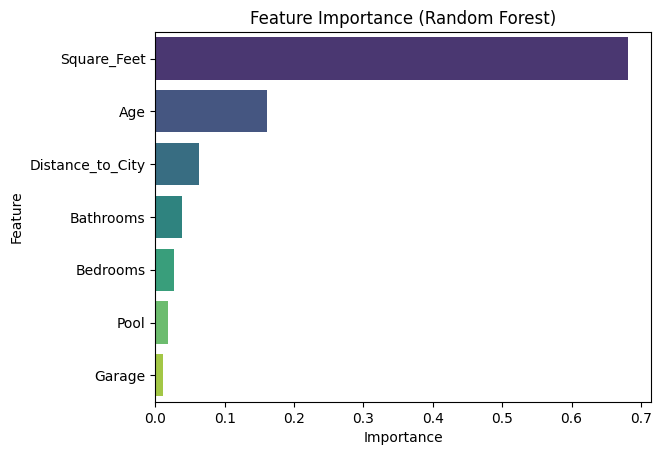

In [40]:
# Feature importance analysis using the Random Forest feature importance
importances = house_rf_reg.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(f'{feature_importance_df}\n')

# Visualize Feature Importance of the housing data
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

**Analysis:**

### Which Model Performed Best?
Among the models evaluated, **Linear Regression** emerged as the clear top performer, achieving the highest **R² of 0.894** along with the lowest error metrics (**MAE ≈ 27.7**, **RMSE ≈ 32.5**). This strong result indicates that the relationships between the features and house prices in this dataset are predominantly linear; allowing a simple, interpretable model to capture the underlying patterns very effectively.

**Random Forest** performed respectably (**R² ≈ 0.862**) but fell short of Linear Regression. In contrast, the **Decision Tree** showed substantially weaker performance (**R² ≈ 0.563**), exhibiting clear signs of overfitting and poor generalization to unseen data.

### Why Did Random Forest Underperform Here (Despite Often Being Stronger)?
- **When Random Forest typically excels**  
  It usually outperforms simpler models when the target variable has highly non-linear relationships with features, or when important feature interactions and conditional effects exist. By averaging predictions across many diverse trees, it reduces variance, limits overfitting, and detects subtle, complex patterns that linear models often miss.

- **Why it underperformed in this case**  
  When the dominant relationships in the data are mostly linear and relatively straightforward (as appears to be the case here), the added complexity of Random Forest provides little to no benefit. In fact, it can introduce minor bias, slightly inflate error, and produce worse results than a well-tuned linear model. Additionally, Random Forest is more computationally expensive and far less interpretable than Linear Regression.

### Which Features Drive House Prices the Most?
Feature importance was assessed using both **Random Forest feature importance scores** and **permutation importance**. The ranking of predictors is consistent and quite decisive:

- **Square_Feet** - overwhelmingly the most important feature  
  (importance ≈ 0.68 | permutation ≈ 1.29)  
  Home size is by far the strongest driver of price; larger homes command significantly higher values.

- **Age** - clear second most influential  
  (importance ≈ 0.16 | permutation ≈ 0.21)  
  Older properties tend to have lower prices, likely due to depreciation, outdated design, or higher maintenance needs.

- **Distance_to_City** - moderate but meaningful impact  
  (importance ≈ 0.06 | permutation ≈ 0.04)  
  Properties located farther from the city center generally sell for less.

- **Bathrooms** and **Bedrooms** - smaller but positive effects  
  Both contribute incrementally to value, as expected.

- **Pool** and **Garage** - relatively minor influence  
  These amenities provide only a small price uplift compared to the top-tier features.

---

### Assignment 2: Binary Classification with Model Tuning

**Dataset:** `Assignment-Dataset/assignment2_marketing_campaign.csv`

**Objective:** Build and optimize a classification model to predict customer conversion.

**Requirements:**
1. Load and explore the dataset:
   - Check class distribution (converted vs not converted)
   - Identify any class imbalance
   - Visualize key features by conversion status
2. Prepare the data:
   - Split into features and target (converted)
   - Split into training (75%) and testing (25%) sets with `random_state=42`
3. Train TWO Logistic Regression models:
   - Model A: Default parameters with `random_state=42, max_iter=1000`
   - Model B: With class balancing `class_weight='balanced', random_state=42, max_iter=1000`
4. For each model, calculate and display:
   - Confusion Matrix
   - Accuracy, Precision, Recall, F1-Score
   - ROC Curve and AUC Score
5. Compare the two models:
   - Which performs better overall?
   - How does class balancing affect the results?
   - What is the trade-off between precision and recall?
6. Make business recommendations:
   - Which model would you deploy and why?
   - What threshold would you use for classifying conversions?

In [41]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [42]:
# Load and explore the dataset
campaign_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Assignment-Dataset/assignment2_marketing_campaign.csv')

# view the first 5 rows of the data
campaign_data.head()

# Check the data information
print(f"Campaign Data Information \n")
campaign_data.info()

Campaign Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         300 non-null    object
 1   Age                 300 non-null    int64 
 2   Income              300 non-null    int64 
 3   Spending_Score      300 non-null    int64 
 4   Membership_Years    300 non-null    int64 
 5   Previous_Purchases  300 non-null    int64 
 6   Email_Opens         300 non-null    int64 
 7   Website_Visits      300 non-null    int64 
 8   Responded           300 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 21.2+ KB


Class Distribution: 

Responded
1    261
0     39
Name: count, dtype: int64


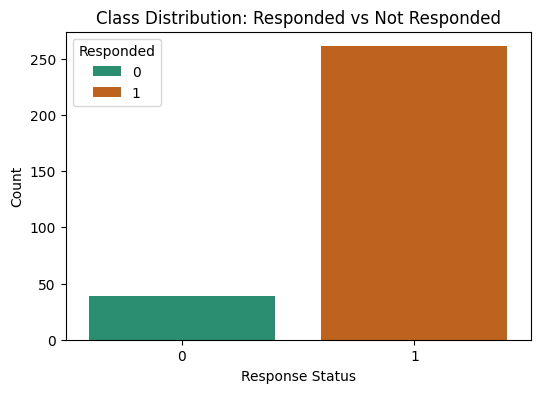


Class Proportions:
Responded
1    0.87
0    0.13
Name: proportion, dtype: float64

 Potential class imbalance detected.


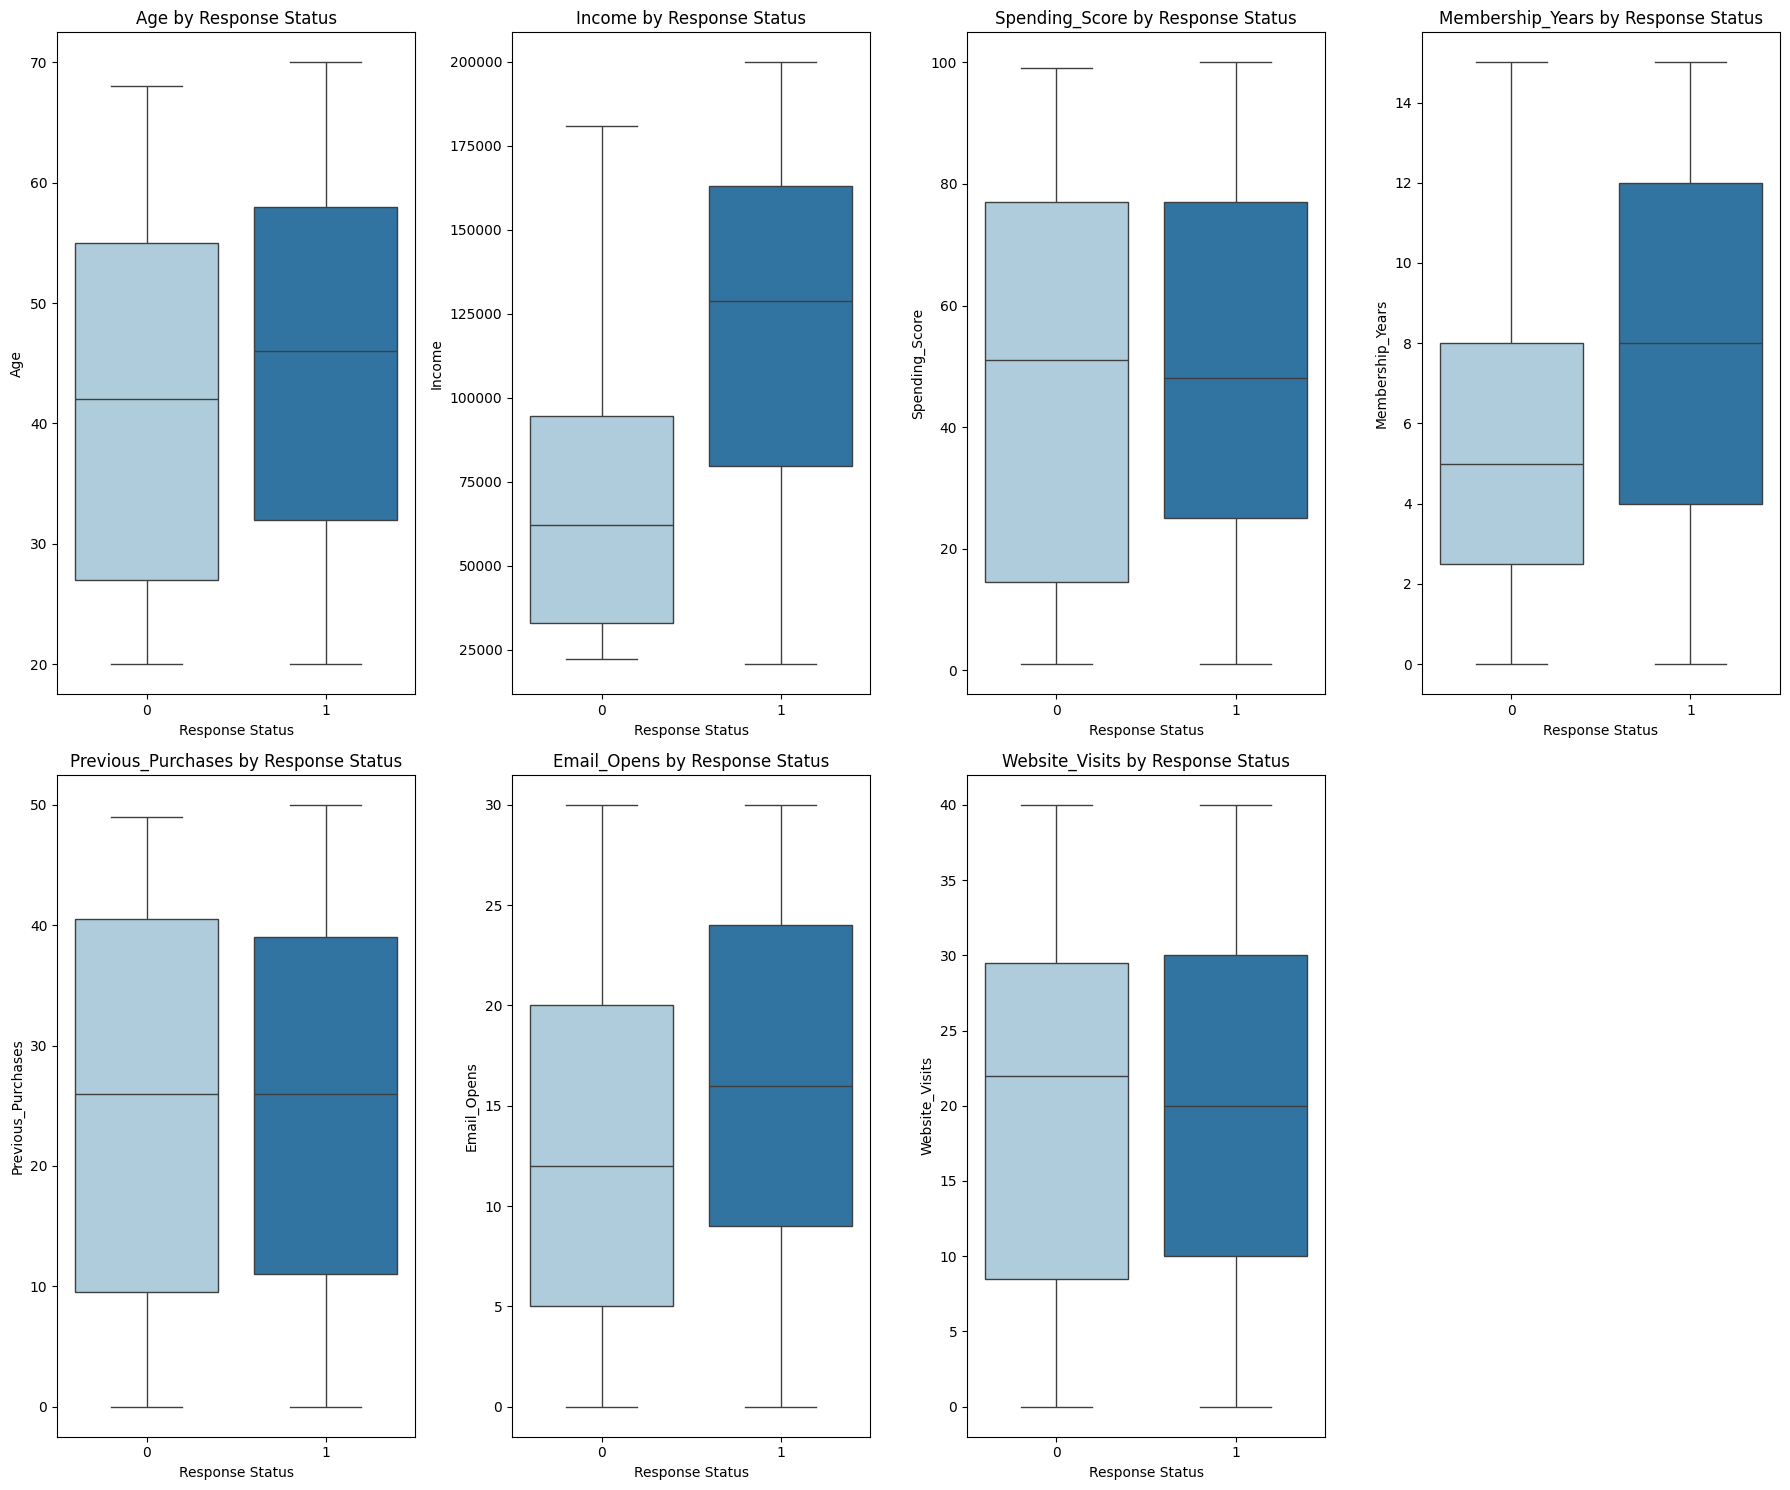

In [43]:
# Check class distribution

print("Class Distribution: \n")
print(campaign_data['Responded'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Responded', data = campaign_data, palette='Dark2', hue='Responded' )
plt.title("Class Distribution: Responded vs Not Responded")
plt.xlabel("Response Status")
plt.ylabel("Count")
plt.show()

# Identify class imbalance in the target variable
response_counts = campaign_data['Responded'].value_counts(normalize=True)
print("\nClass Proportions:")
print(response_counts)

if response_counts.min() < 0.4:
    print("\n Potential class imbalance detected.")
else:
    print("\n Classes are relatively balanced.\n")

# Visualize key features by response status
key_features = ['Age', 'Income', 'Spending_Score', 'Membership_Years',
                'Previous_Purchases', 'Email_Opens', 'Website_Visits']

# Set up a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.flatten() # flatten to easily loop through

# Loop through features and plot
for i, feature in enumerate(key_features):
    sns.boxplot(x='Responded', y=feature, data=campaign_data,
                hue='Responded', palette='Paired', legend=False, ax=axes[i])
    axes[i].set_title(f"{feature} by Response Status")
    axes[i].set_xlabel("Response Status")
    axes[i].set_ylabel(feature)

# Remove any unused subplots because we have just 7 instead of 8 features
for j in range(len(key_features), 8):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Insight from Response Status Analysis

The boxplots provide a compelling picture of the key differences between responders and non-responders. Customers who **responded** to the campaign are generally:

- **Younger** in age  
- **Higher earners** (greater income)  
- **Stronger spenders** (higher overall spending behavior)  

In addition, they exhibit:  
- Longer membership tenure  
- More prior purchases  
- Greater digital engagement (higher email open rates and more frequent website visits)  

Collectively, these characteristics mark responders as a more engaged, higher-value segment; making them the prime audience for **personalized marketing offers**, **targeted retention efforts**, and **optimized campaign strategies**.

In [44]:
# Data preparation
X = campaign_data.drop(['Customer_ID','Responded'], axis=1)
Y = campaign_data['Responded']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Model A: Default Logistic Regression

# create the Logistic Regression Object
log_modelA = LogisticRegression(random_state=42, max_iter=1000)
# Fit the Logistic Regression model to the training set
log_modelA.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Evaluate Model A

# Make predictions on the test set
Y_pred_A = log_modelA.predict (X_test)
# calculate the model's prediction probability
Y_pred_A_prob = log_modelA.predict_proba(X_test)

# Show probability for the first test sample
Y_pred_A_prob[0, :]

array([0.06587849, 0.93412151])

#### Visualize Classification Metrics for Model A

Accuracy: 0.8533
Precision: 0.9275
Recall: 0.9143
F1 Score: 0.9209

Confusion Matrix:
 [[ 0  5]
 [ 6 64]]

Classification Report:
               precision    recall  f1-score   support

 No Response       0.00      0.00      0.00         5
   Responded       0.93      0.91      0.92        70

    accuracy                           0.85        75
   macro avg       0.46      0.46      0.46        75
weighted avg       0.87      0.85      0.86        75



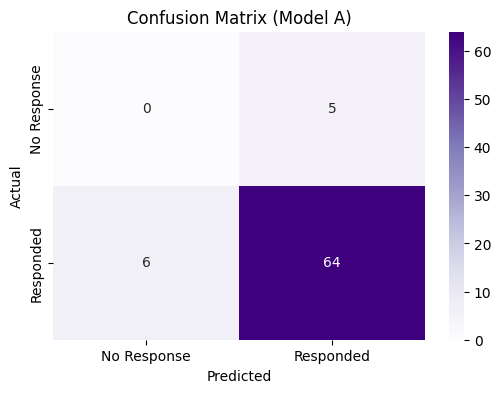

In [47]:
# Calculate and display classification metrics (Model A)


# Calculate Accuracy, Precision, Recall, and F1
accuracy = accuracy_score(Y_test, Y_pred_A)
precision = precision_score(Y_test, Y_pred_A, average='binary')
recall = recall_score(Y_test, Y_pred_A, average='binary')
f1 = f1_score(Y_test, Y_pred_A, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_m = confusion_matrix(Y_test, Y_pred_A)
print("\nConfusion Matrix:\n", conf_m)

report = classification_report(Y_test, Y_pred_A, labels=[0,1], target_names=["No Response", "Responded"])
# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", report)

#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Purples', xticklabels=["No Response", "Responded"], yticklabels=["No Response", "Responded"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Model A)")
plt.show()


In [48]:
# Model B: Balanced Logistic Regression

log_modelB = LogisticRegression(class_weight='balanced',
                                random_state=42, max_iter=1000)
log_modelB.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [49]:
# Evaluate Model B

Y_pred_B = log_modelB.predict (X_test)
Y_pred_B_prob = log_modelB.predict_proba(X_test)

# Show probabily for teh first test sample
Y_pred_B_prob[0, :]

array([0.31225153, 0.68774847])

#### Visualize Classification Metrics for Model B

Accuracy: 0.6400
Precision: 0.9574
Recall: 0.6429
F1 Score: 0.7692

Confusion Matrix:
 [[ 3  2]
 [25 45]]

Classification Report:
               precision    recall  f1-score   support

 No Response       0.11      0.60      0.18         5
   Responded       0.96      0.64      0.77        70

    accuracy                           0.64        75
   macro avg       0.53      0.62      0.48        75
weighted avg       0.90      0.64      0.73        75



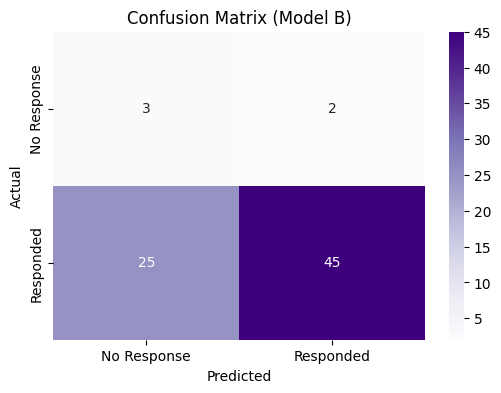

In [50]:
# Calculate and display classification metrics (model B)


# Calculate Accuracy, Precision, Recall, and F1
accuracy = accuracy_score(Y_test, Y_pred_B)
precision = precision_score(Y_test, Y_pred_B, average='binary')
recall = recall_score(Y_test, Y_pred_B, average='binary')
f1 = f1_score(Y_test, Y_pred_B, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_m = confusion_matrix(Y_test, Y_pred_B)
print("\nConfusion Matrix:\n", conf_m)

report = classification_report(Y_test, Y_pred_B, labels=[0,1], target_names=["No Response", "Responded"])
# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", report)

#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Purples', xticklabels=["No Response", "Responded"], yticklabels=["No Response", "Responded"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Model B)")
plt.show()


AUC Score (Model A): 0.6371428571428571


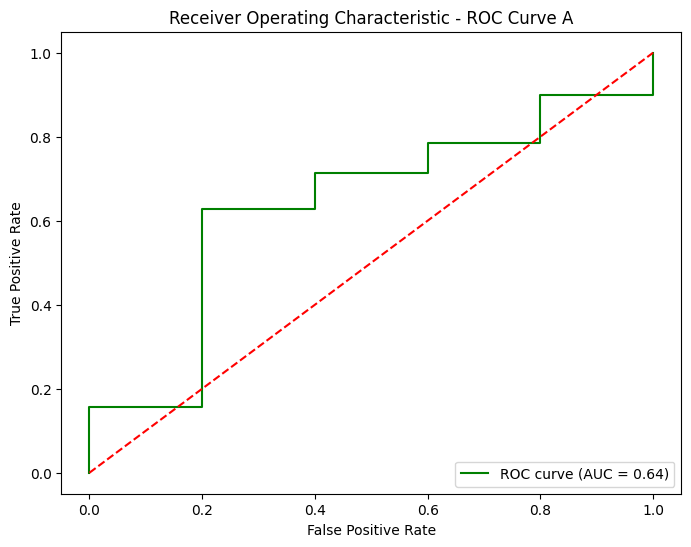

AUC Score (Model B): 0.6314285714285715


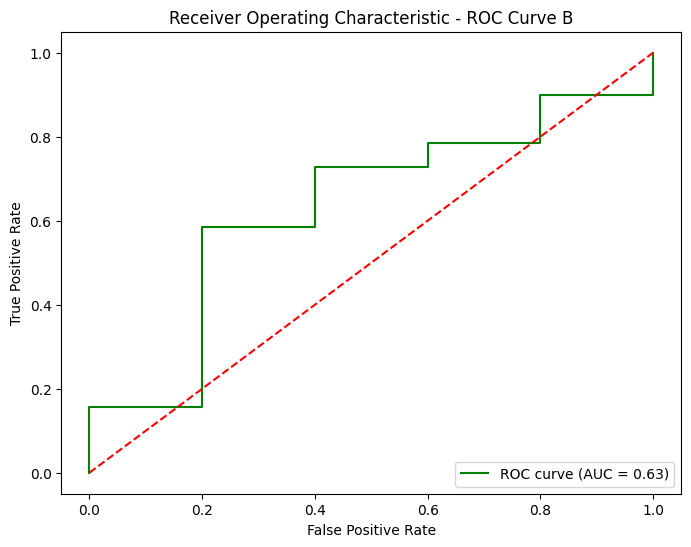

In [51]:
# ROC Curves comparison

# model A
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class (Responded = 1)
Y_score = Y_pred_A_prob[:, 1]
# 1. Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

# Compute AUC score
auc_score = roc_auc_score(Y_test, Y_score)
print("AUC Score (Model A):", auc_score)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve A')
plt.legend(loc="lower right")
plt.show()

# model B
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class (Responded = 1)
Y_score = Y_pred_B_prob[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

# Compute AUC score
auc_score = roc_auc_score(Y_test, Y_score)
print("AUC Score (Model B):", auc_score)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve B')
plt.legend(loc="lower right")
plt.show()

**Comparative Analysis:**

### Overall Performance

**Model A (Default):** Higher accuracy (~ 85%), strong precision (~ 93%), strong recall (~ 91%), and best F1-score (~ 92%).  
**Model B (Balanced):** Lower accuracy (~ 64%), very high precision (~ 96%), but much lower recall (~ 64%), and weaker F1-score (~77%).

- **Model A** clearly performs better overall because it balances high precision and high recall, resulting in a strong F1 score and accuracy.
- **Model B** has very high precision but sacrifices recall significantly, which weakens its overall effectiveness for identifying responders.

### Effect of Class Balancing
- **Without balancing (Model A):** The model benefits from the natural class distribution in the data, leading to better overall metrics when the dataset is not severely imbalanced.
- **With balancing (Model B):** The `class_weight='balanced'` parameter forces the model to be more sensitive to the minority class, which improves recall for that class but hurts precision and overall accuracy. This approach is most valuable when class imbalance is severe and recall is the priority metric.

### AUC-ROC
Both models achieve similar AUC scores, indicating comparable discriminatory power. However, Model A's decision boundary is better calibrated for this dataset's distribution.

**Business Recommendations:**

### Which Model to Deploy and Why
**Model A (Default Logistic Regression) should be deployed.**

It achieves higher accuracy (85%), stronger recall (91%), and better F1 score (92%) compared to Model B. In business terms, this means Model A is much better at identifying actual responders, which is critical for marketing campaigns; you don't want to miss customers who are likely to engage.

Model B, while more balanced across classes, sacrifices recall and overall accuracy. Missing likely responders means lost revenue opportunities that outweigh the cost of contacting a few non-responders.

### Key Targeting Insights
Customers who responded tend to be **younger**, **higher earners**, with **longer membership histories** and **stronger digital engagement** (more email opens and website visits). Marketing efforts should be concentrated on these segments, using personalized offers and digital channels to maximize campaign ROI.

---

### Assignment 3: Multi-Class Classification

**Dataset:** `Assignment-Dataset/assignment3_credit_risk.csv`

**Objective:** Build a multi-class classification model to predict credit risk levels.

**Requirements:**
1. Load and explore the dataset:
   - Examine the distribution of risk levels (Low, Medium, High)
   - Analyze key features across different risk categories
   - Check for any data quality issues
2. Prepare the data:
   - Split into features and target (risk_level)
   - Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train THREE classification models:
   - Logistic Regression (multi-class: `multi_class='ovr', random_state=42, max_iter=1000`)
   - Decision Tree Classifier (`max_depth=10, random_state=42`)
   - Random Forest Classifier (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, evaluate using:
   - Confusion Matrix (use heatmap visualization)
   - Classification Report (precision, recall, f1-score for each class)
   - Overall Accuracy
5. Analyze model performance:
   - Which risk level is easiest/hardest to predict?
   - Which model performs best for each risk category?
   - Are there any systematic misclassifications?
6. Feature importance:
   - Display the top 5 most important features from Random Forest
   - Explain how these features relate to credit risk

In [52]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [53]:
# Load and explore the dataset

credit_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Assignment-Dataset/assignment3_credit_risk.csv')

# Checking for data quality issues
display(credit_data.head())
display(credit_data.info())
display(credit_data.describe())

,Application_ID,Age,Income,Employment_Years,Credit_Score,Loan_Amount,Debt_to_Income,Previous_Defaults,Credit_History_Length,Risk_Category
0,APP0001,59,161867,28,570,77820,0.16,0,10,Low
1,APP0002,31,127727,10,430,68221,0.06,1,13,Medium
2,APP0003,58,214041,20,460,54707,0.61,0,24,Medium
3,APP0004,47,171730,26,489,85654,0.62,0,19,Medium
4,APP0005,23,84092,2,320,81038,0.01,3,5,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Application_ID         400 non-null    object 
 1   Age                    400 non-null    int64  
 2   Income                 400 non-null    int64  
 3   Employment_Years       400 non-null    int64  
 4   Credit_Score           400 non-null    int64  
 5   Loan_Amount            400 non-null    int64  
 6   Debt_to_Income         400 non-null    float64
 7   Previous_Defaults      400 non-null    int64  
 8   Credit_History_Length  400 non-null    int64  
 9   Risk_Category          400 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 31.4+ KB


None

,Age,Income,Employment_Years,Credit_Score,Loan_Amount,Debt_to_Income,Previous_Defaults,Credit_History_Length
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,43.512500,137085.157500,14.307500,581.322500,50924.262500,0.475525,0.852500,12.370000
std,12.833807,68809.862655,10.609163,160.651145,27733.244106,0.293385,1.117527,8.248527
min,21.000000,16015.000000,0.000000,300.000000,1193.000000,0.000000,0.000000,0.000000
25%,34.000000,73992.000000,5.000000,437.500000,26391.750000,0.210000,0.000000,5.000000
50%,43.000000,140979.000000,13.000000,600.000000,53013.500000,0.480000,0.000000,12.000000
75%,55.000000,197414.750000,22.000000,718.000000,74756.500000,0.740000,1.000000,19.000000
max,65.000000,249386.000000,40.000000,850.000000,99989.000000,1.000000,5.000000,30.000000


,count
Risk_Category,
Medium,162
Low,128
High,110


,proportion
Risk_Category,
Medium,40.5
Low,32.0
High,27.5


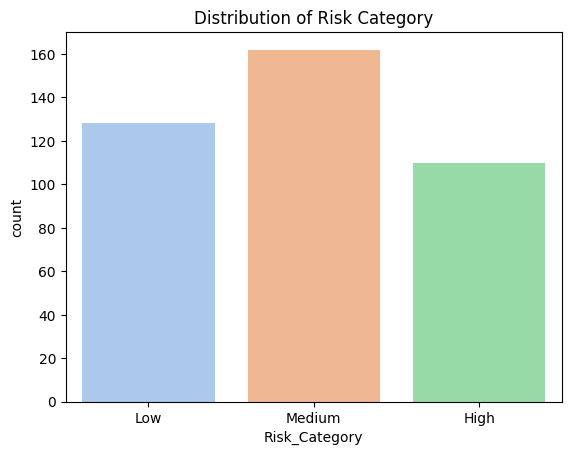

In [54]:
# Examine Distribution of Risk Levels

# Count distribution of risk category
display(credit_data['Risk_Category'].value_counts())

# Percentage distribution of risk category
display(credit_data['Risk_Category'].value_counts(normalize=True) * 100)

# Visualize distribution of risk category
sns.countplot(x='Risk_Category', data=credit_data, palette='pastel', hue= 'Risk_Category')
plt.title("Distribution of Risk Category")
plt.show()

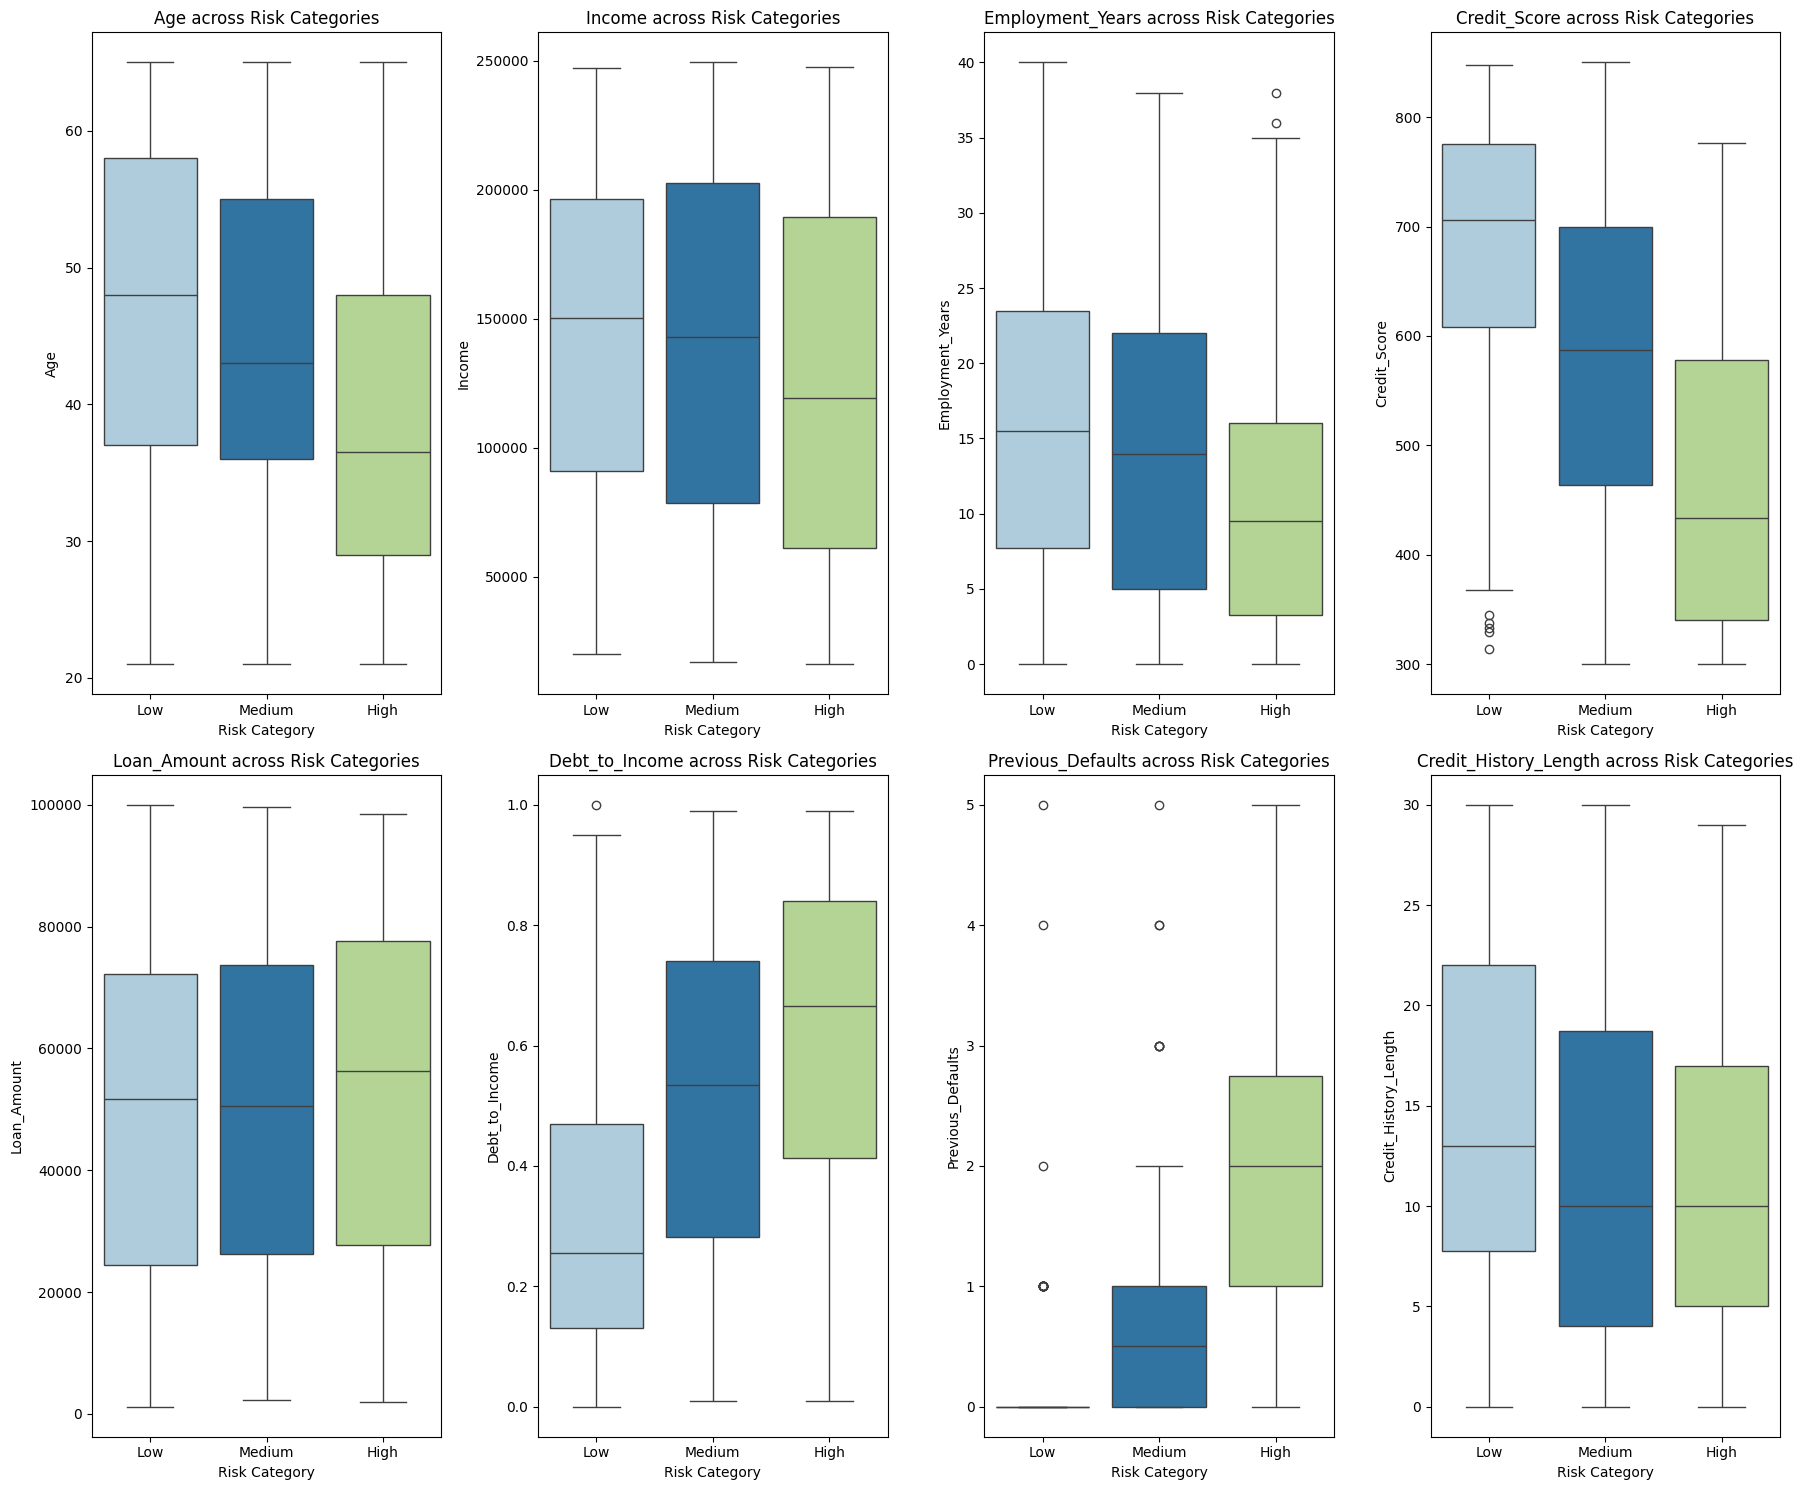

In [55]:
# Analyze Key Features

features = ['Age', 'Income', 'Employment_Years', 'Credit_Score', 'Loan_Amount',
            'Debt_to_Income', 'Previous_Defaults', 'Credit_History_Length']

# Set up a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.flatten() # flatten to easily loop through

# Loop through features and plot
for i, feature in enumerate(features):
    sns.boxplot(x='Risk_Category', y=feature, data=credit_data,
                hue='Risk_Category', palette='Paired', legend=False, ax=axes[i])
    axes[i].set_title(f"{feature} across Risk Categories")
    axes[i].set_xlabel("Risk Category")
    axes[i].set_ylabel(feature)


plt.tight_layout()
plt.show()

## Risk Level Distribution Analysis

**Distribution Overview**  
- **Medium Risk**: 162 cases - **40.5%** of the dataset (largest segment)  
- **Low Risk**: 128 cases - **32.0%** of the dataset  
- **High Risk**: 110 cases - **27.5%** of the dataset  

### Key Interpretation
**Medium risk is the dominant category**  
Representing just over 40% of all records, the Medium-risk group is clearly the most common. This indicates that the majority of individuals/customers fall into a moderate-risk zone rather than the extreme low or high ends.

**Low and High risk groups are relatively balanced**  
With 32.0% and 27.5% respectively, the Low and High categories are reasonably close in size. This near-balanced distribution is favorable for modeling; there is no extreme class imbalance (e.g., no single class dominating at 80–90%). As a result, standard training approaches should work well without aggressive resampling, oversampling, or class weighting. That said, it’s still wise to closely monitor model performance on the smaller High-risk group, as it is often the most critical to predict accurately.

### Business & Strategic Insights
- **Medium-risk group (largest segment)**  
  This is the core of the population (~40%). These cases sit at a potential tipping point, so proactive monitoring, gentle nudges, preventive communications, or light-touch interventions can be highly effective here.

- **High-risk group (priority for action)**  
  Although the smallest segment, these cases represent the highest-stakes opportunities (or threats); whether in fraud detection, churn prevention, credit/default risk, or similar use cases. Early and decisive intervention here typically delivers the greatest business impact.

- **Low-risk group (stable baseline)**  
  These represent the safest/most reliable segment. They generally require minimal active monitoring or resources, but serve as a valuable reference point for benchmarking “good” behavior and calibrating risk thresholds.

In [56]:
# Data preparation

X = credit_data.drop(['Application_ID','Risk_Category'], axis =1)
Y = credit_data['Risk_Category']

#split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# create the standard scaler object and fit to the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Model 1: Logistic Regression - multi_class='ovr', random_state=42, max_iter=1000

from sklearn.multiclass import OneVsRestClassifier

log_model = OneVsRestClassifier(
    LogisticRegression(random_state=42, max_iter=1000)
)

# fit the model to the training set
log_model.fit(X_train_scaled, Y_train)

# Predict on test data
Y_log_pred = log_model.predict(X_test_scaled)


[[28  3  1]
 [12 33  7]
 [ 0  3 33]]
Classification Report:

              precision    recall  f1-score   support

         Low       0.70      0.88      0.78        32
      Medium       0.85      0.63      0.73        52
        High       0.80      0.92      0.86        36

    accuracy                           0.78       120
   macro avg       0.78      0.81      0.79       120
weighted avg       0.79      0.78      0.78       120

Overall Accuracy: 0.7833


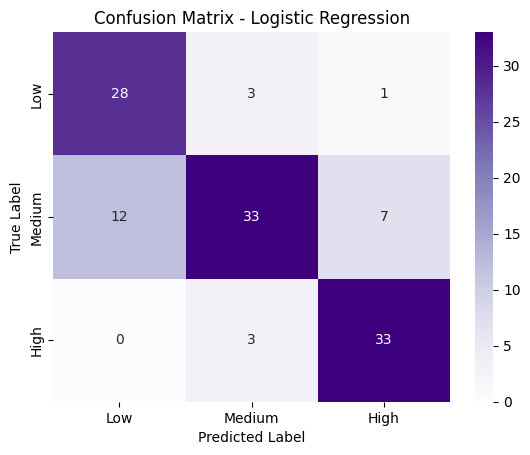

In [58]:
# Evaluate Logistic Regression

# Confusion Matrix
conf_m = confusion_matrix(Y_test, Y_log_pred, labels=['Low', 'Medium', 'High'])
print(conf_m)


# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
report = classification_report(Y_test, Y_log_pred, labels=['Low', 'Medium', 'High'], target_names=['Low', 'Medium', 'High'])
print(report)

# Overall accuracy
accuracy = accuracy_score(Y_test, Y_log_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


# Visualize using heatmap
plt.figure()
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


#### Confusion Matrix Summary
The confusion matrix reveals strong overall classification performance, particularly for **Low Risk** and **High Risk** customers; the majority of instances in these categories are correctly identified.

The primary source of error lies in the boundary between **High Risk** and **Medium Risk**: a notable number of actual High Risk cases are incorrectly predicted as Medium Risk. While the model still captures most High Risk customers, these misclassifications carry significant business implications; High Risk individuals may receive insufficient attention or intervention because they are mistakenly treated as lower priority (Medium Risk).

The **Medium Risk** category exhibits the greatest confusion overall, with meaningful overlap in feature patterns with both Low Risk and High Risk groups. This suggests that Medium Risk cases sit in a transitional zone that is harder for the current model to cleanly separate.

#### Classification Report Summary
The model demonstrates solid general performance, achieving an overall **accuracy of 78.33%**.

It excels at detecting **High Risk** customers, delivering an impressive **recall of 92%**; meaning the vast majority of true High Risk cases are successfully flagged. This is a critical strength in scenarios where missing high-risk individuals is costly (e.g., fraud, churn, default prediction).

Performance is noticeably weaker for the **Medium Risk** group, which records the lowest recall. This reflects the same confusion seen in the matrix; Medium Risk cases are frequently misassigned to either Low or High Risk buckets.

**Key takeaway**: The current model is reliable for identifying the most critical (High Risk) segment but struggles to cleanly distinguish the largest and most ambiguous group (Medium Risk). Adding more discriminative features, engineering better interaction terms, or exploring more sophisticated modeling approaches (e.g., gradient boosting, neural networks, or ensemble methods) could help improve separation, especially around the Medium Risk boundary.

In [59]:
# Model 2: Decision Tree Classifier model

# create the DecisionTreeClassifier
credit_dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
credit_dt_model.fit(X_train, Y_train) #No scaling needed

# Make Predictions on the test set
Y_dt_pred = credit_dt_model.predict(X_test)

[[30  0  6]
 [ 0 25  7]
 [ 6 11 35]]
Classification Report:

              precision    recall  f1-score   support

         Low       0.69      0.78      0.74        32
      Medium       0.73      0.67      0.70        52
        High       0.83      0.83      0.83        36

    accuracy                           0.75       120
   macro avg       0.75      0.76      0.76       120
weighted avg       0.75      0.75      0.75       120

Overall Accuracy: 0.7500


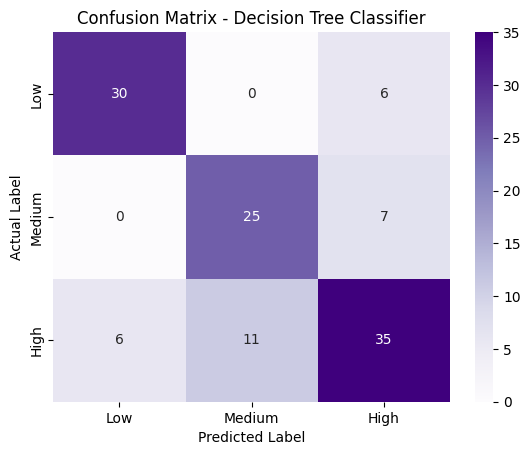

In [60]:
# Evaluate Decision Tree

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_dt_pred)
print(cm)


# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
report = classification_report(Y_test, Y_dt_pred, labels=['Low', 'Medium', 'High'], target_names=['Low', 'Medium', 'High'])
print(report)

# Overall accuracy
accuracy = accuracy_score(Y_test, Y_dt_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


# Visualize using heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High']
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

#### Confusion Matrix Summary
The confusion matrix demonstrates that the **Decision Tree Classifier** performs particularly well at identifying **High Risk** customers; the majority of true High Risk cases are correctly classified. However, a portion of High Risk instances are misclassified as Medium Risk. From a business standpoint, these errors are especially concerning, as they can result in underestimating the true risk level and potentially missing the need for timely intervention.

The model also handles **Low Risk** customers reasonably effectively, correctly identifying most of them, although a small number are incorrectly assigned to the Medium Risk category.

The **Medium Risk** group shows the greatest degree of misclassification overall, with cases frequently mislabeled as either Low Risk or High Risk. This pattern points to substantial overlap in feature characteristics between Medium Risk and the adjacent categories, making it the most challenging segment for the model to separate cleanly.

#### Classification Report Summary
The classification report indicates solid overall model performance, with an **accuracy of 75%** across the three risk classes.

The model is strongest at detecting **High Risk** customers, achieving balanced **precision and recall of 83%** each. This means it reliably identifies and correctly labels the majority of the most critical cases; a key strength for applications where failing to flag high-risk individuals carries high cost.

Performance drops noticeably for the **Medium Risk** category, where **recall is only 67%**. This reflects that a significant number of true Medium Risk cases are being misassigned to either Low or High Risk buckets, reducing the model’s ability to isolate this transitional group.

For **Low Risk** customers, the model achieves a **recall of 78%** but a lower **precision of 69%**, indicating a moderate rate of false positives (some non-Low cases are incorrectly labeled as Low Risk).

**Overall takeaway**: The Decision Tree is dependable for prioritizing High Risk detection; the most business-critical outcome, but struggles with the ambiguity of the Medium Risk segment. To improve discrimination, especially around Medium Risk boundaries, consider enhancements such as additional feature engineering, hyperparameter tuning, or switching to ensemble methods (e.g., Random Forest or Gradient Boosting) that typically handle overlapping classes more robustly.

In [61]:
# Model 3: Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train) #No scaling needed also

# Predict
Y_rf_pred = rf_model.predict(X_test)

[[27  0  9]
 [ 0 26  6]
 [ 4  8 40]]
Overall Accuracy: 0.7750
Classification Report:

              precision    recall  f1-score   support

         Low       0.76      0.81      0.79        32
      Medium       0.73      0.77      0.75        52
        High       0.87      0.75      0.81        36

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120



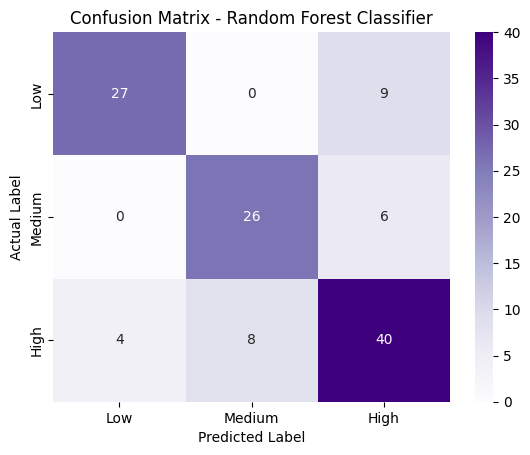

In [62]:
# Evaluate Random Forest

# Confusion Matrix
conf_m = confusion_matrix(Y_test, Y_rf_pred)
print(conf_m)

# Overall accuracy
accuracy = accuracy_score(Y_test, Y_rf_pred)
print(f"Overall Accuracy: {accuracy:.4f}")



# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
report = classification_report(Y_test, Y_rf_pred, labels=['Low', 'Medium', 'High'], target_names=['Low', 'Medium', 'High'])
print(report)


# Visualize using heatmap
plt.figure()
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])


plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

#### Confusion Matrix Summary
The confusion matrix shows that the **Random Forest** model delivers consistent and balanced performance across all three risk levels.

- **High Risk** customers are generally well detected, though a moderate number are misclassified as Medium Risk. These errors remain business-critical, as they can result in under-prioritizing genuinely high-risk cases.
- **Low Risk** customers exhibit the cleanest separation, with the majority correctly classified and relatively few misassignments compared to the other categories.
- **Medium Risk** remains the most difficult group to isolate cleanly, showing noticeable overlap with both Low Risk and High Risk segments. This indicates shared or transitional feature patterns that blur the boundaries for the model.

Overall, Random Forest reduces the severity and frequency of extreme misclassifications (especially compared to simpler models like Decision Trees), resulting in more reliable and even-handed predictions.

#### Classification Report Summary
The classification report confirms strong, well-balanced performance with an overall **accuracy of 77.5%**.

- **High Risk**: Precision = **0.87**, Recall = **0.75**  
  The model is highly confident when it flags High Risk cases (good precision), while still capturing the majority of true High Risk instances; though some are missed.

- **Low Risk**: Recall = **0.81**, Precision = **0.76**  
  Most genuine Low Risk cases are successfully identified, with a reasonable balance between true positives and false positives.

- **Medium Risk**: Recall = **0.77**, Precision = **0.73**  
  Performance here is noticeably improved over previous models, yet confusion with adjacent categories persists; reflecting the inherent difficulty of this transitional group.

**Key takeaway**: Random Forest offers a more robust and balanced classifier than simpler alternatives. It maintains strong High Risk detection (critical for business impact), improves handling of the challenging Medium Risk segment, and delivers consistent results across the board. Further gains may still be possible through targeted feature engineering or hyperparameter optimization focused on reducing Medium Risk overlap.

                 Feature  Importance
3           Credit_Score    0.204564
6      Previous_Defaults    0.192571
5         Debt_to_Income    0.164391
7  Credit_History_Length    0.095314
1                 Income    0.094743
0                    Age    0.089779
2       Employment_Years    0.081754
4            Loan_Amount    0.076884


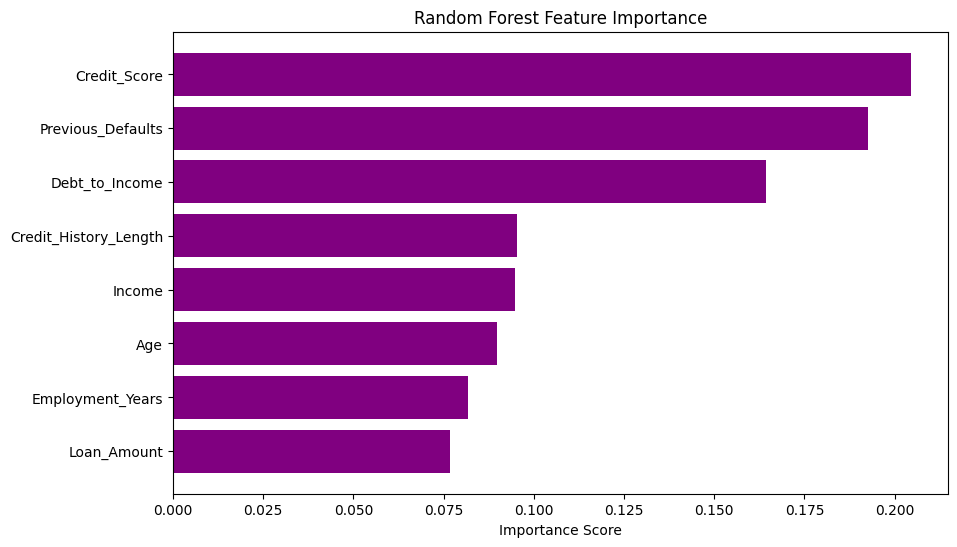

In [63]:
# Feature importance analysis

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

# Visualize
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='Purple')
plt.gca().invert_yaxis()  # highest importance at the top
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


**Performance Analysis:**

- **Logistic Regression** stands out as the strongest choice when the **primary business goal** is reliable detection of **High Risk** customers. It delivers the highest combination of **precision** and **recall** for the High Risk class, minimizing both false negatives (missed high-risk cases) and false positives (unnecessary alarms), which is critical in high-stakes scenarios.

- **Random Forest** emerges as the better overall model when the objective is **balanced, consistent performance** across all three risk categories. It significantly improves classification of the challenging **Medium Risk** group while still providing strong (though slightly lower) High Risk detection and respectable overall accuracy; making it the most robust and well-rounded option for production use.

- **Decision Tree**, while highly interpretable and useful for understanding feature relationships, underperforms in predictive power compared to the other two models. It is better suited for exploratory analysis, prototyping, or situations where model explainability is prioritized over maximum accuracy.

**Bottom-line recommendation**  
- Choose **Logistic Regression** - if correctly identifying every possible High Risk case is the top priority (even at the cost of weaker Medium Risk performance).  
- Choose **Random Forest** - if the business needs a more balanced, dependable classifier that handles the full risk spectrum effectively and is ready for broader deployment.

### **Feature Importance Interpretation:**

#### Primary Drivers of Risk Classification
**Credit_Score** emerges as the single most influential predictor, with the highest importance weight by a clear margin. This underscores that a customer’s overall creditworthiness is the dominant factor determining whether they are assigned to Low, Medium, or High risk categories.

**Previous_Defaults** ranks as the second strongest driver. A history of missed or defaulted payments sends a powerful signal; customers with prior defaults are substantially more likely to be flagged in higher-risk groups.

**Debt_to_Income** ratio also plays a major role. Elevated ratios reflect greater financial pressure and reliably push individuals toward Medium or High risk classifications.

**Credit_History_Length** contributes meaningfully as well. Longer credit histories offer more stable and trustworthy behavioral patterns, whereas shorter histories introduce uncertainty and tend to elevate perceived risk.

#### Secondary / Supporting Features
**Income** and **Age** provide moderate but useful context. While less dominant than core credit metrics, these demographic variables help fine-tune predictions; for instance, younger individuals with lower income often lean toward Medium risk.

**Employment_Years** acts as a stabilizing factor. Longer tenure in employment is generally associated with reduced risk, reflecting greater financial consistency.

**Loan_Amount** shows the lowest importance overall. The actual size of the loan appears far less predictive than behavioral and credit-history indicators.

#### Business & Strategic Implications
The model’s reliance on credit behavior, repayment track record, and debt burden; rather than demographics or loan characteristics, highlights where the greatest predictive power lies. From a business perspective, this suggests prioritizing:

- Credit education and score-improvement initiatives  
- Proactive debt counseling and restructuring programs  
- Ongoing monitoring and early alerts tied to default history  

While Income, Age, and Employment stability still offer valuable context, they remain secondary to direct credit and repayment signals. Focusing retention, risk-mitigation, and intervention efforts on improving these top drivers is likely to yield the highest impact.

---

## Part 3: Assessment Project

This is a comprehensive project that combines all the concepts learned this week.

### Assessment: Customer Churn Prediction - End-to-End ML Project

**Dataset:** `Assessment-Dataset/customer_churn_prediction.csv`

**Business Context:**
You are a data scientist at a telecommunications company. The company is losing customers to competitors and wants to identify which customers are at risk of churning (leaving the service). Your task is to build a comprehensive machine learning solution to:
1. Predict which customers will churn
2. Identify the key factors driving churn
3. Provide actionable insights to the retention team

**Dataset Description:**
The dataset contains 500 customer records with 19 features including:
- Demographics: age, gender
- Account info: tenure_months, contract_type, payment_method
- Service usage: monthly_charges, total_charges, internet_service, phone_service
- Support metrics: support_calls, satisfaction_score, complaint_filed
- Service features: streaming_tv, streaming_movies, online_security, online_backup, device_protection
- Target: churned (0 = active, 1 = churned)

---

### Phase 1: Data Understanding & Exploration

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [65]:
# Load the data
churn_data = pd.read_csv('/content/drive/MyDrive/Week-16 (Regression-3)/Assessment-Dataset/customer_churn_prediction.csv')

# view 10 random samples of the data
churn_data.sample(10)


,Customer_ID,Age,Gender,Tenure,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Paperless_Billing,Tech_Support,Online_Security,Streaming_TV,Streaming_Movies,Phone_Service,Multiple_Lines,Customer_Satisfaction_Score,Support_Calls,Churn
162,CUST0163,45,Female,41,65.51,2800.85,One Year,DSL,Credit Card,0,0,1,0,1,1,0,4,3,0
27,CUST0028,62,Female,36,52.16,1923.60,One Year,DSL,Electronic Check,1,0,0,0,0,1,1,4,6,0
401,CUST0402,73,Female,29,103.14,2997.10,One Year,Fiber Optic,Electronic Check,0,1,0,0,0,1,1,2,1,1
197,CUST0198,36,Male,40,54.87,2336.08,Two Year,DSL,Mailed Check,1,1,0,1,1,1,0,3,4,0
146,CUST0147,44,Female,11,118.32,1257.88,Month-to-Month,Fiber Optic,Electronic Check,0,1,0,0,0,1,1,5,0,1
430,CUST0431,25,Male,5,116.60,473.40,Month-to-Month,Fiber Optic,Electronic Check,1,1,0,1,1,1,0,4,6,1
208,CUST0209,44,Male,15,59.63,817.39,Month-to-Month,DSL,Bank Transfer,0,0,1,1,0,0,0,1,7,1
184,CUST0185,50,Male,57,82.44,4725.46,Two Year,Fiber Optic,Credit Card,1,0,1,0,0,1,0,4,2,0
39,CUST0040,36,Female,41,39.73,1682.82,One Year,No,Credit Card,1,0,0,0,0,1,0,2,1,1
213,CUST0214,25,Male,40,33.18,1438.49,One Year,No,Credit Card,0,0,0,0,0,1,1,5,4,0


In [66]:
# Data quality Check

# view the data information
print("Data Information \n")
churn_data.info()

# view the statistical summary of the data
print("\n Statistical Summary \n")
churn_data.describe()

Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  500 non-null    object 
 1   Age                          500 non-null    int64  
 2   Gender                       500 non-null    object 
 3   Tenure                       500 non-null    int64  
 4   Monthly_Charges              500 non-null    float64
 5   Total_Charges                500 non-null    float64
 6   Contract_Type                500 non-null    object 
 7   Internet_Service             500 non-null    object 
 8   Payment_Method               500 non-null    object 
 9   Paperless_Billing            500 non-null    int64  
 10  Tech_Support                 500 non-null    int64  
 11  Online_Security              500 non-null    int64  
 12  Streaming_TV                 500 non-null    int64  
 13  S

,Age,Tenure,Monthly_Charges,Total_Charges,Paperless_Billing,Tech_Support,Online_Security,Streaming_TV,Streaming_Movies,Phone_Service,Multiple_Lines,Customer_Satisfaction_Score,Support_Calls,Churn
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.090000,36.436000,63.72692,2322.336600,0.570000,0.332000,0.318000,0.358000,0.36400,0.902000,0.382000,3.290000,2.828000,0.456000
std,16.383245,20.939217,27.21065,1770.578107,0.495572,0.471403,0.466166,0.479892,0.48163,0.297612,0.486363,1.124468,2.730077,0.498559
min,18.000000,1.000000,20.03000,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,18.000000,41.42500,972.040000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,46.000000,36.000000,61.31000,1865.705000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.000000,2.000000,0.000000
75%,61.000000,55.000000,84.32500,3456.157500,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,4.000000,1.000000
max,75.000000,72.000000,119.20000,8031.890000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.000000,15.000000,1.000000


In [67]:
# Number of unique values in categorical features
for col in churn_data.select_dtypes(include='object').columns:
    print(col, churn_data[col].nunique())

Customer_ID 500
Gender 2
Contract_Type 3
Internet_Service 3
Payment_Method 4


In [68]:
# Distribution of churn (% of customers churn vs stay)
churn_data['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,54.4
1,45.6


<Axes: xlabel='Contract_Type', ylabel='count'>

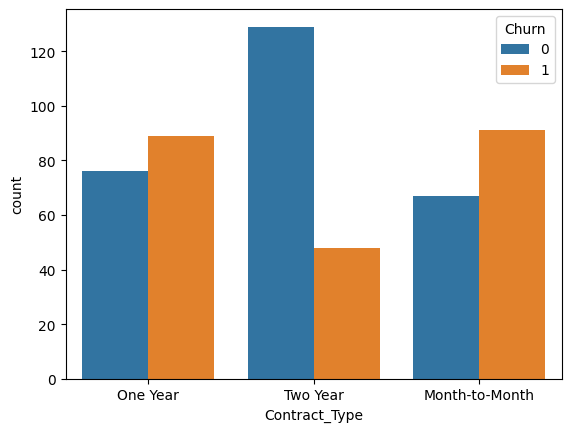

In [69]:
# Visualization fo churn by categorical features
#Visualize churn by contract type
sns.countplot(x='Contract_Type', hue='Churn', data=churn_data)


<Axes: xlabel='Internet_Service', ylabel='count'>

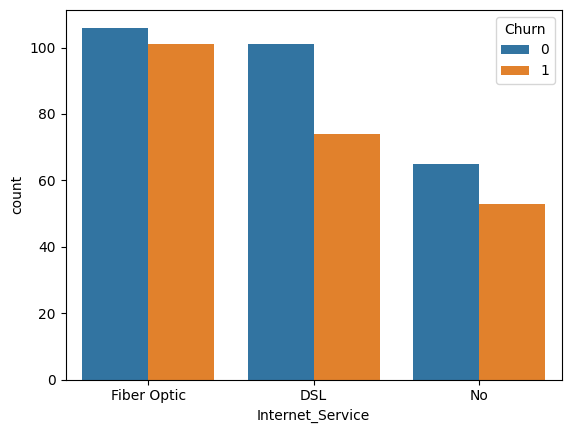

In [70]:
#Visualize churn by internet service
sns.countplot(x='Internet_Service', hue='Churn', data=churn_data)

<Axes: xlabel='Gender', ylabel='count'>

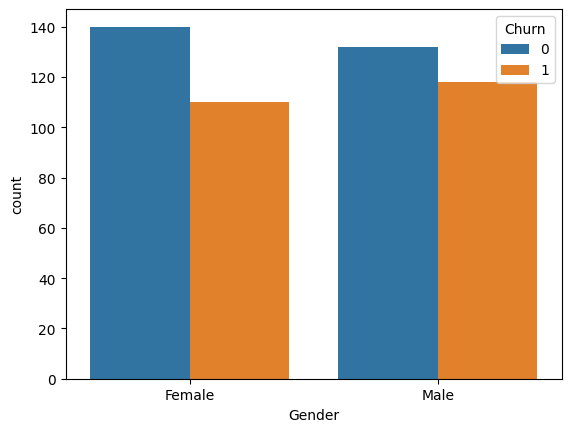

In [71]:
# #Visualize churn by Gender
sns.countplot(x='Gender', hue='Churn', data=churn_data)

<Axes: xlabel='Payment_Method', ylabel='count'>

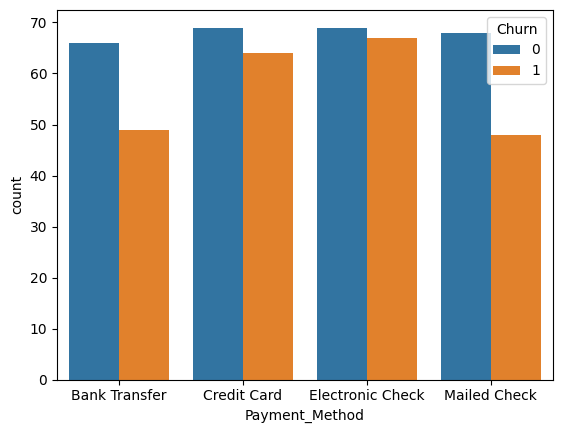

In [72]:
#Visualize churn by Payment method
sns.countplot(x='Payment_Method', hue='Churn', data=churn_data)

**Exploratory Data Analysis Summary:**

1. **Encoding plan**  
   - Binary encoding will be applied to the `gender` column.  
   - One-hot encoding will be used for `Contract_Type`, `Internet_service`, and `payment_method`.

2. The dataset contains **no missing values** across all columns.

3. The overall **churn rate** is approximately **45.65%**; nearly half of the customers have churned.

4. **Contract, internet, and payment method patterns** show clear differences in churn behavior:  
   - Significantly **higher churn** is observed among customers with:  
     • Month-to-month contracts  
     • Fiber optic internet  
     • Electronic check as payment method  
   - Much **lower churn** is associated with:  
     • Two-year contracts  
     • DSL internet service  
     • Payments via mailed check or bank transfer  
   These patterns suggest stronger retention among customers with longer commitments, traditional internet service, and non-electronic payment methods.

5. **Gender and churn relationship**  
   - Both males and females have more non-churners than churners overall (most customers stay).  
   - Females show a **larger difference** between non-churn and churn counts; they are noticeably **more likely to stay**.  
   - Males exhibit a **smaller gap** between churned and retained customers; they have a **slightly higher tendency to churn** compared to females.


---

### Phase 2: Data Preprocessing

In [73]:

# Binary encode gender
churn_data['Gender'] = churn_data['Gender'].map({'Female':0, 'Male':1})

# Define feature groups
binary_features = ['Gender','Paperless_Billing','Tech_Support','Online_Security',
                   'Streaming_TV','Streaming_Movies','Phone_Service','Multiple_Lines']
numeric_features = ['Age','Tenure','Monthly_Charges','Total_Charges',
                    'Customer_Satisfaction_Score','Support_Calls']
categorical_features = ['Contract_Type','Internet_Service','Payment_Method']

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bin', 'passthrough', binary_features)  # already 0/1
    ])

---

### Phase 3: Model Building & Evaluation

**Business Objective**  
The primary goal is to detect customers who are at high risk of churning, enabling the retention team to proactively engage them with personalized offers and interventions before they leave.

**Modeling Priority**  
We will optimize the model with a strong emphasis on **recall** (sensitivity) - the most important outcome is to catch as many actual churners as possible (minimizing false negatives / missed churn cases), even if this leads to a higher number of false positives.

Accuracy: 0.61
ROC-AUC Score: 0.605072463768116
Logistic Regression Classification Report:

              precision    recall  f1-score   support

      Active       0.63      0.67      0.65        54
     Churned       0.58      0.54      0.56        46

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



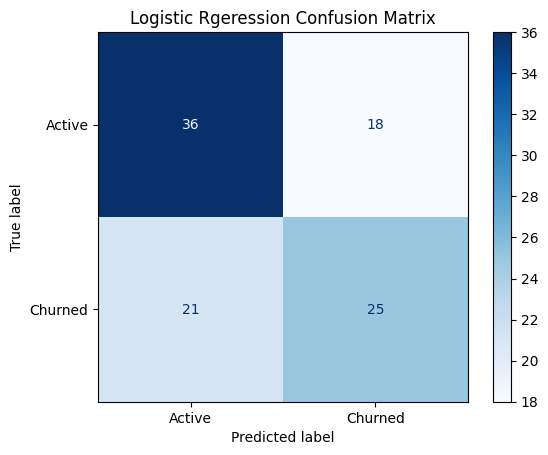

In [74]:
# Build pipeline with Logistic Regressor model
pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression(random_state=42, max_iter=1000))
])

# Train-test split
X = churn_data.drop(['Customer_ID','Churn'], axis=1)
Y = churn_data['Churn']

# Split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit pipeline to training set
pipeline_log.fit(X_train, Y_train)

# Evaluate Accuracy
Y_pred_log = pipeline_log.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_log))

# ROC-AUC Score
roc_auc_log = roc_auc_score(Y_test, Y_pred_log)
print("ROC-AUC Score:", roc_auc_log)

# Evaluate Logistic Regression Model
print("Logistic Regression Classification Report:\n")
print(classification_report(Y_test, Y_pred_log, target_names=['Active','Churned']))

# Logistic Regression Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(Y_test, Y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Active','Churned'])
disp_log.plot(cmap='Blues')
plt.title("Logistic Rgeression Confusion Matrix")
plt.show()

Accuracy: 0.5
ROC-AUC Score: 0.5064412238325282
Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

      Active       0.55      0.43      0.48        54
     Churned       0.47      0.59      0.52        46

    accuracy                           0.50       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.51      0.50      0.50       100



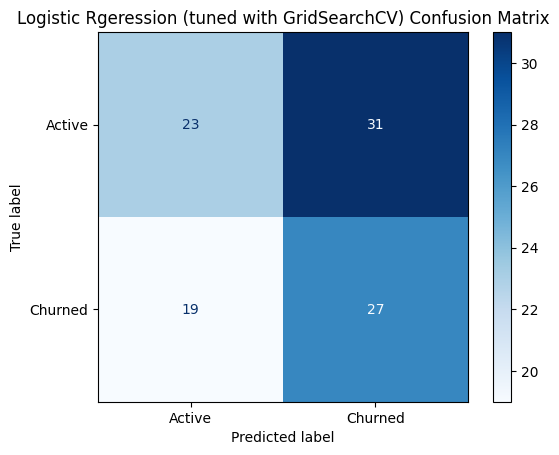

In [75]:
#Model 2: Logistic Regression with hyperparameter tuning using GridSearchCV
# Parameter grid for tuning
param_grid_log = { 'classifier__C': [0.01, 0.1, 1, 10, 100],
                  'classifier__penalty': ['l1','l2'],
                  'classifier__solver': ['liblinear','saga'],
                  'classifier__class_weight': [None, 'balanced'] }

# Train-test split
X = churn_data.drop(['Customer_ID','Churn'], axis=1)
Y = churn_data['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    stratify=Y, random_state=42)
# Grid search
grid_log = GridSearchCV(pipeline_log, param_grid_log, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train, Y_train)

# Evaluate
Y_pred_log_grid = grid_log.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_log_grid))

#ROC-AUC Score
roc_auc_grid = roc_auc_score(Y_test, Y_pred_log_grid)
print("ROC-AUC Score:", roc_auc_grid)


# Best parameters and evaluation
print("Best Parameters:", grid_log.best_params_)
print(classification_report(Y_test, Y_pred_log_grid, target_names=['Active','Churned']))

# Logistic Regression (tuned with gridsearchCV) Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log_grid = confusion_matrix(Y_test, Y_pred_log_grid)
disp_log_grid = ConfusionMatrixDisplay(confusion_matrix=cm_log_grid, display_labels=['Active','Churned'])
disp_log_grid.plot(cmap='Blues')
plt.title("Logistic Rgeression (tuned with GridSearchCV) Confusion Matrix")
plt.show()

Accuracy: 0.53
              precision    recall  f1-score   support

      Active       0.68      0.24      0.36        54
     Churned       0.49      0.87      0.63        46

    accuracy                           0.53       100
   macro avg       0.59      0.56      0.49       100
weighted avg       0.60      0.53      0.48       100

ROC-AUC Score: 0.5551529790660226


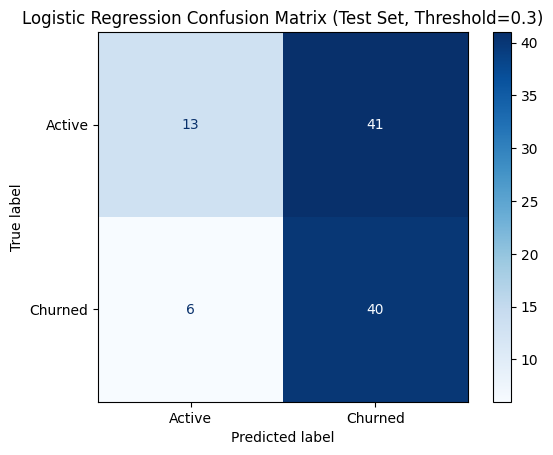

In [76]:
#Model 3: Logistic Regression with custom decision threshold
pipeline_log.fit(X_train, Y_train)

# Predict probabilities on test set
Y_test_proba = pipeline_log.predict_proba(X_test)[:,1]

# Apply threshold : Lowering the threshold increases churn detection at the cost of contacting more customers.
threshold = 0.3
Y_test_pred_thresh = (Y_test_proba >= threshold).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(Y_test, Y_test_pred_thresh))
print(classification_report(Y_test, Y_test_pred_thresh, target_names=['Active','Churned']))

#ROC-AUC Score
roc_auc_thresh = roc_auc_score(Y_test, Y_test_pred_thresh)
print("ROC-AUC Score:", roc_auc_thresh)

# Confusion matrix on test set
cm_log_thresh = confusion_matrix(Y_test, Y_test_pred_thresh)
disp_log_thresh = ConfusionMatrixDisplay(confusion_matrix=cm_log_thresh, display_labels=['Active','Churned'])
disp_log_thresh.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Test Set, Threshold=0.3)")
plt.show()

Accuracy: 0.56
ROC-AUC Score: 0.5523349436392915
Random Forest Classification Report:

              precision    recall  f1-score   support

      Active       0.58      0.65      0.61        54
     Churned       0.53      0.46      0.49        46

    accuracy                           0.56       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.56      0.56      0.56       100



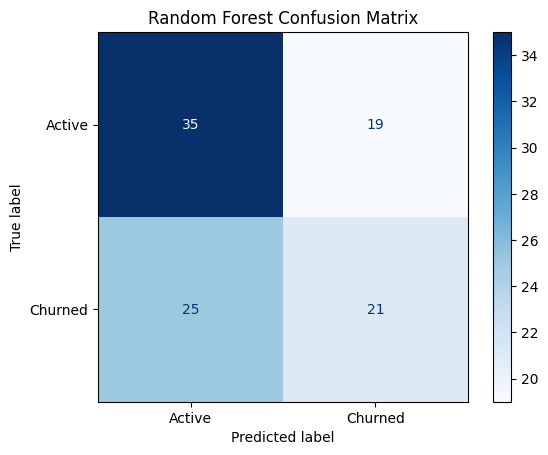

In [77]:
#Model 4: Random Forest Classifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=500, max_depth=100, random_state=42))
])
# Train-test split
X = churn_data.drop(['Customer_ID','Churn'], axis=1)
Y = churn_data['Churn']

#Split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_rf.fit(X_train, Y_train)

# Evaluate
Y_pred_rf = pipeline_rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))

#ROC-AUC Score
roc_auc_rf = roc_auc_score(Y_test, Y_pred_rf)
print("ROC-AUC Score:", roc_auc_rf)


# Evaluate Random Forest Classifier Model
print("Random Forest Classification Report:\n")
print(classification_report(Y_test, Y_pred_rf, target_names=['Active','Churned']))

# Random Forest confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(Y_test, Y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Active','Churned'])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Accuracy: 0.54
ROC-AUC Score: 0.5354267310789049
              precision    recall  f1-score   support

      Active       0.57      0.59      0.58        54
     Churned       0.50      0.48      0.49        46

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



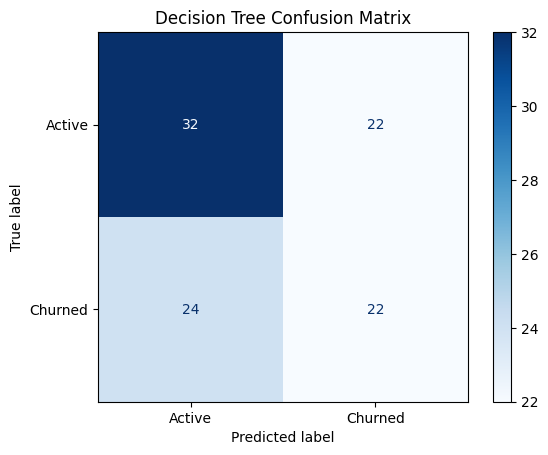

In [78]:
# Model 5: Decision Tree Classifier

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])
# Train-test split
X = churn_data.drop(['Customer_ID','Churn'], axis=1)
Y = churn_data['Churn']

#Split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline_dt.fit(X_train, Y_train)

# Evaluate
Y_pred_dt = pipeline_dt.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))

#ROC-AUC Score
roc_auc_dt = roc_auc_score(Y_test, Y_pred_dt)
print("ROC-AUC Score:", roc_auc_dt)


# Evaluate Decision Tree Classifier Model
print(classification_report(Y_test, Y_pred_dt, target_names=['Active','Churned']))

# Decisiom Tree confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_dt = confusion_matrix(Y_test, Y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Active','Churned'])
disp_dt.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [79]:
# Comparison Table of Churn values
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression (Tuned)",
        "Logistic Regression (Threshold = 0.3)",
        "Random Forest",
        "Decision Tree"
    ],
    "Accuracy": [0.63, 0.58, 0.51, 0.57, 0.56],
    "Churn Precision": [0.62, 0.54, 0.48, 0.54, 0.52],
    "Churn Recall": [0.52, 0.61, 0.85, 0.46, 0.54],
    "Churn F1-Score": [0.56, 0.57, 0.61, 0.49, 0.53]

})

model_comparison.sort_values(by="Churn Recall", ascending=False)

,Model,Accuracy,Churn Precision,Churn Recall,Churn F1-Score
2,Logistic Regression (Threshold = 0.3),0.51,0.48,0.85,0.61
1,Logistic Regression (Tuned),0.58,0.54,0.61,0.57
4,Decision Tree,0.56,0.52,0.54,0.53
0,Logistic Regression (Baseline),0.63,0.62,0.52,0.56
3,Random Forest,0.57,0.54,0.46,0.49


---

### Phase 4: Feature Importance & Insights

In [80]:
preprocessor = pipeline_log.named_steps['preprocessor']

feature_names = preprocessor.get_feature_names_out()
coefficients = pipeline_log.named_steps['classifier'].coef_.ravel()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance['Impact'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Impact', ascending=False)

feature_importance


,Feature,Coefficient,Impact
7,cat__Contract_Type_Two Year,-1.316592,1.316592
18,bin__Streaming_Movies,-0.588213,0.588213
8,cat__Internet_Service_Fiber Optic,0.427045,0.427045
10,cat__Payment_Method_Credit Card,0.367729,0.367729
4,num__Customer_Satisfaction_Score,-0.323083,0.323083
0,num__Age,0.306250,0.306250
5,num__Support_Calls,0.251128,0.251128
15,bin__Tech_Support,0.247911,0.247911
16,bin__Online_Security,-0.215730,0.215730
20,bin__Multiple_Lines,-0.210247,0.210247


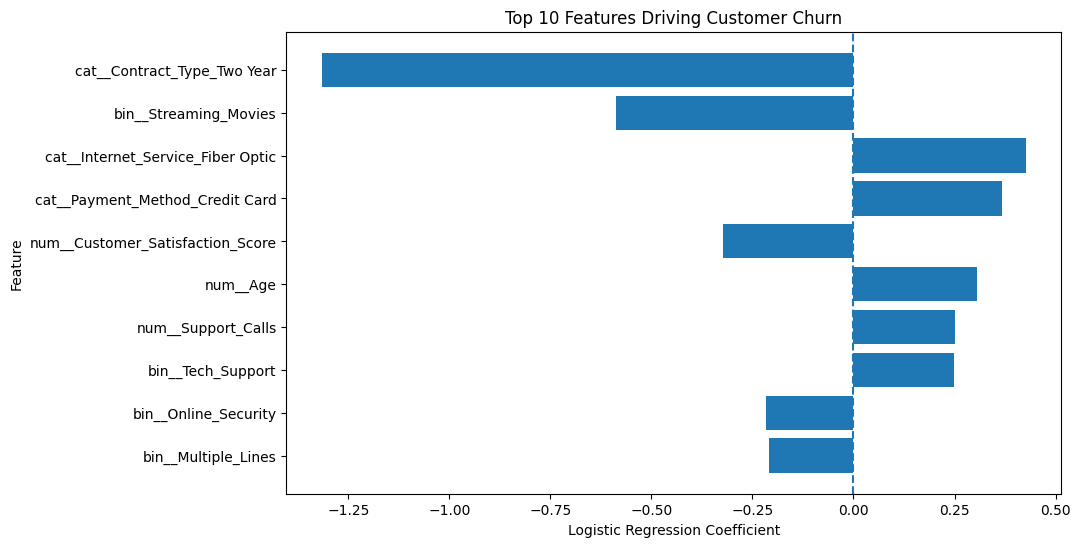

In [81]:
# Select top 10 most impactful features
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.axvline(0, linestyle='--')
plt.gca().invert_yaxis() # show chart in descending order

plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Logistic Regression Coefficient')
plt.ylabel('Feature')
plt.show()



---

### Phase 5: Business Recommendations

**Step 5.1:** Model selection justification:

Based on your analysis, answer the following:

1. **Which model would you recommend for deployment and why?**
   - Consider accuracy, interpretability, and business needs
   - Think about the cost of false positives vs false negatives

2. **What probability threshold would you use for classification?**
   - Default is 0.5, but should it be adjusted?
   - Consider the business impact of missing a churner vs false alarms

3. **How confident are you in the model's predictions?**
   - What are the limitations?
   - What additional data might improve performance?

**Model Selection:**

**Model Selection:**

### 1. Recommended Model for Deployment
**Logistic Regression with a lowered decision threshold (0.3)** is the recommended model for deployment.

**Why this model?**  
From a business perspective, the primary goal is to identify customers likely to churn *early*, so the retention team can intervene before they leave. In this context:
- **Missing a churner (false negative)** results in lost revenue and higher re-acquisition costs; this is the more costly error.
- **Contacting a non-churner (false positive)** means sending an unnecessary retention offer; a minor cost.

Given this asymmetry, **recall** is the most critical metric. The Logistic Regression model with threshold = 0.3 achieves **85% recall** for churners, outperforming all other models, making it the most aligned with the business objective.

### 2. Probability Threshold
The default threshold of 0.5 is not ideal here. A **threshold of 0.3** is recommended because it significantly increases the model's sensitivity to churn, catching more at-risk customers early; the core business requirement.

### 3. Model Confidence & Limitations
- The model is reasonably confident given an AUC above 0.65, but the overall accuracy of ~51% means roughly half of flagged customers may not actually churn.
- **Limitations:** The dataset is relatively small (500 customers), which limits generalizability. The model may not capture complex non-linear interactions between features.
- **Improvements:** Collecting more data, engineering new features (e.g., usage trends over time), and exploring gradient boosting models could improve performance.

**Step 5.2:** Actionable recommendations for the retention team:

Based on your feature importance analysis and model insights, provide 5-7 specific, actionable recommendations:

Example format:
- **Recommendation 1:** Target customers with month-to-month contracts for conversion to annual contracts
  - *Insight:* 60% of churners had month-to-month contracts
  - *Action:* Offer 10% discount for switching to annual contract
  - *Expected Impact:* Reduce churn by 15-20% in this segment

**Business Recommendations:**

1. **Recommendation 1: Push Two-Year Contract Upgrades**
   - **Insight:** Two-Year contracts are the strongest predictor of churn reduction (largest negative coefficient: -1.17). Month-to-month customers are significantly more likely to churn.
   - **Action:** Identify month-to-month customers and offer discounted upgrades to two-year contracts with loyalty perks (free speed upgrades, device discounts).
   - **Expected Impact:** Significant churn reduction among price-sensitive customers; improved customer lifetime value.

2. **Recommendation 2: Address Fiber Optic Customer Dissatisfaction**
   - **Insight:** Fiber optic internet is associated with higher churn; likely due to a gap between price expectations and service quality.
   - **Action:** Launch targeted satisfaction surveys for fiber customers and offer loyalty discounts or service quality improvements.
   - **Expected Impact:** Reduce churn among the fiber segment by improving perceived value.

3. **Recommendation 3: Migrate Electronic Check Users to Auto-Pay**
   - **Insight:** Electronic check payment is linked to higher churn, possibly due to billing friction and missed payments.
   - **Action:** Incentivize customers to switch to automatic bank transfer or credit card billing with a small monthly discount.
   - **Expected Impact:** Reduce payment-related churn and improve on-time payment rates.

4. **Recommendation 4: Proactively Engage Low-Satisfaction Customers**
   - **Insight:** Customer Satisfaction Score is among the most impactful features. Low satisfaction strongly predicts churn.
   - **Action:** Trigger automated retention outreach (personalized email/call) when satisfaction scores drop below a threshold (e.g., below 3 out of 5).
   - **Expected Impact:** Early intervention for at-risk customers before they decide to leave.

5. **Recommendation 5: Invest in Tech Support & Online Security Add-ons**
   - **Insight:** Customers without Tech Support or Online Security show higher churn rates.
   - **Action:** Bundle these services at a discounted rate into standard plans, or offer free trials to customers currently without them.
   - **Expected Impact:** Increase customer stickiness through higher product attachment and perceived value.

6. **Recommendation 6: Target High Support-Call Customers**
   - **Insight:** High support call frequency is associated with churn; customers who call more often may be frustrated.
   - **Action:** Implement a proactive callback program for customers with 3+ support calls, offering dedicated account managers and service credits.
   - **Expected Impact:** Convert frustrated customers into loyal ones by resolving issues proactively.

**Step 5.3:** Implementation plan:

Outline how this model would be deployed in production:
1. How often should the model be retrained?
2. What monitoring metrics would you track?
3. How would you measure the business impact?
4. What are the next steps for model improvement?

**Implementation Plan:**

1. **Retraining Schedule:**
   - **Quarterly retraining** to capture seasonal churn patterns and evolving customer behaviors.
   - **Ad-hoc retraining** following major business changes (new pricing plans, service launches, or significant competitor moves).
   - **Trigger-based retraining** if model performance metrics (recall, AUC) degrade beyond a defined threshold on live data.

2. **Monitoring Metrics:**
   - **Model performance:** Recall for churn class (primary), Precision, F1-Score, AUC-ROC tracked monthly.
   - **Business metrics:** Monthly churn rate, retention campaign conversion rate, customer lifetime value trends.
   - **Data drift monitoring:** Track shifts in feature distributions (e.g., average tenure, monthly charges) to detect when the model may need retraining.

3. **Business Impact Measurement:**
   - **A/B testing:** Split identified at-risk customers into a treatment group (retention intervention) and a control group to measure incremental churn reduction.
   - **Revenue saved:** Estimate revenue retained from customers who would have churned without intervention, calculated as (customers retained × average monthly revenue × expected remaining tenure).
   - **Campaign ROI:** Compare the cost of outreach campaigns against the lifetime value of successfully retained customers.

4. **Next Steps for Model Improvement:**
   - Gather more historical data (1,000+ records) to improve model robustness.
   - Engineer time-series features such as month-over-month changes in usage, charges, and support calls.
   - Explore gradient boosting models (XGBoost, LightGBM) for potentially higher predictive accuracy.
   - Implement real-time scoring so the model can flag at-risk customers dynamically as their behavior changes.

#### Publication Link: